In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 8)

#import xarray as xr
import warnings
warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages

from db_queries import get_outputs as go
from db_queries import get_ids
from get_draws.api import get_draws
from db_queries import get_population

In [2]:
ls /mnt/team/simulation_science/priv/engineering/vivarium_nih_us_cvd/19.5_51_locations/results_data

binned_ldl_exposure_time.csv     risk_exposure_time.csv
binned_ldl_exposure_time.hdf     risk_exposure_time.hdf
binned_sbp_exposure_time.csv     sbp_medication_person_time.csv
binned_sbp_exposure_time.hdf     sbp_medication_person_time.hdf
deaths.csv                       state_person_time.csv
deaths.hdf                       state_person_time.hdf
healthcare_visits.csv            transition_count.csv
healthcare_visits.hdf            transition_count.hdf
intervention_person_time.csv     ylds.csv
intervention_person_time.hdf     ylds.hdf
ldlc_medication_person_time.csv  ylls.csv
ldlc_medication_person_time.hdf  ylls.hdf


In [3]:
sim_results_dir = '/mnt/team/simulation_science/priv/engineering/vivarium_nih_us_cvd/19.5_51_locations/results_data/'

In [4]:
binned_risks_ldl = pd.read_csv(sim_results_dir + 'binned_ldl_exposure_time.csv')
binned_risks_ldl = binned_risks_ldl.loc[(binned_risks_ldl.year == 2040)]
binned_risks_ldl = binned_risks_ldl.groupby(['scenario', 'binned_ldl_limits', 'location']).value.sum().reset_index()
binned_risks_ldl.head()

scenario binned_ldl_limits    location        value
0  baseline        above_4.91     alabama   869.552361
1  baseline        above_4.91      alaska  1072.394251
2  baseline        above_4.91     arizona   863.189596
3  baseline        above_4.91    arkansas   878.138261
4  baseline        above_4.91  california   984.158795

In [5]:
binned_risks_sbp = pd.read_csv(sim_results_dir + 'binned_sbp_exposure_time.csv')
binned_risks_sbp = binned_risks_sbp.loc[(binned_risks_sbp.year == 2040)]
binned_risks_sbp = binned_risks_sbp.groupby(['scenario', 'binned_sbp_limits', 'location']).value.sum().reset_index()
binned_risks_sbp.head()

scenario binned_sbp_limits    location        value
0  baseline         above_140     alabama  5605.442847
1  baseline         above_140      alaska  5299.953457
2  baseline         above_140     arizona  5466.765229
3  baseline         above_140    arkansas  4984.421629
4  baseline         above_140  california  5988.741958

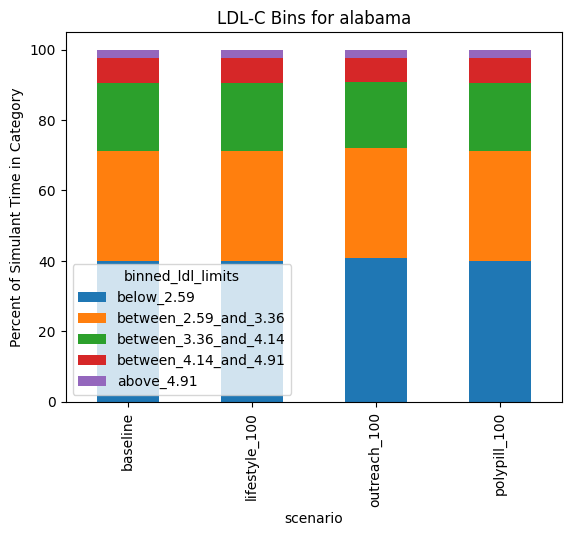

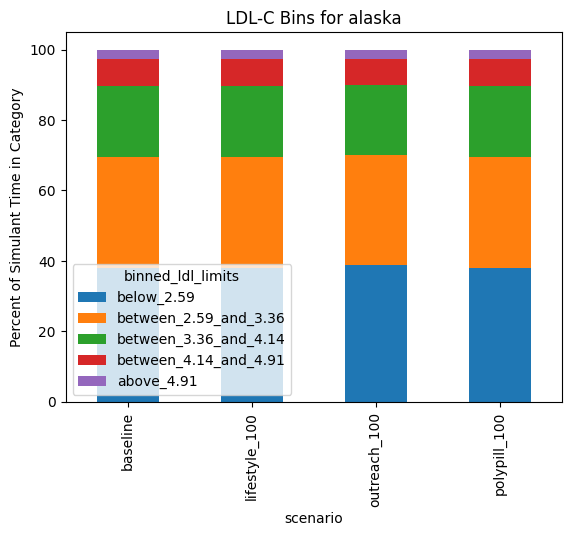

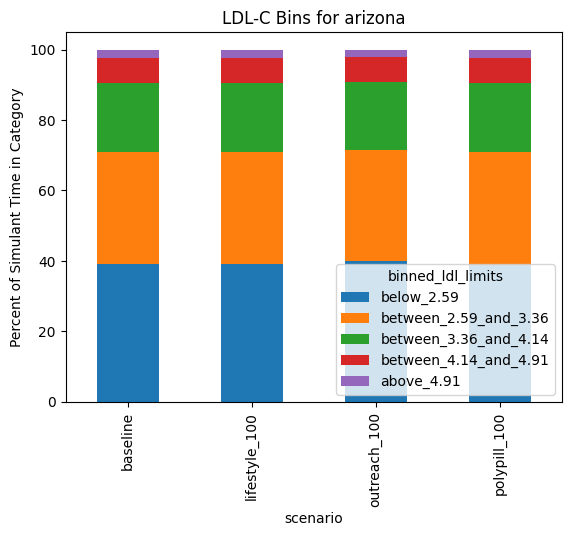

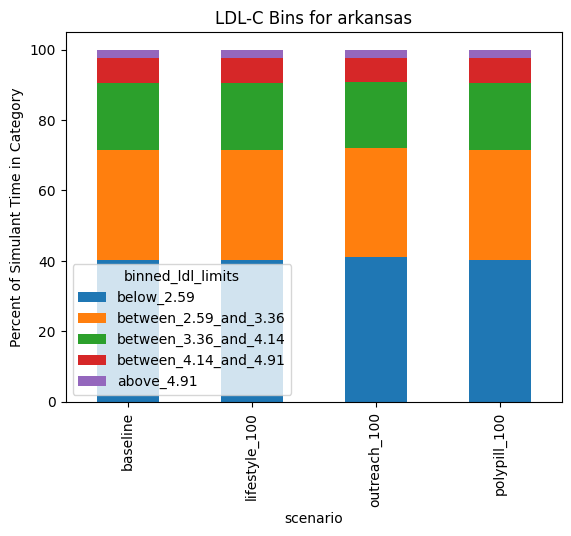

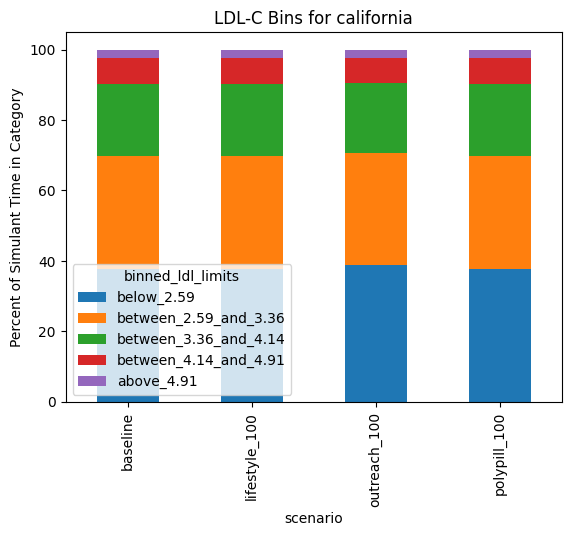

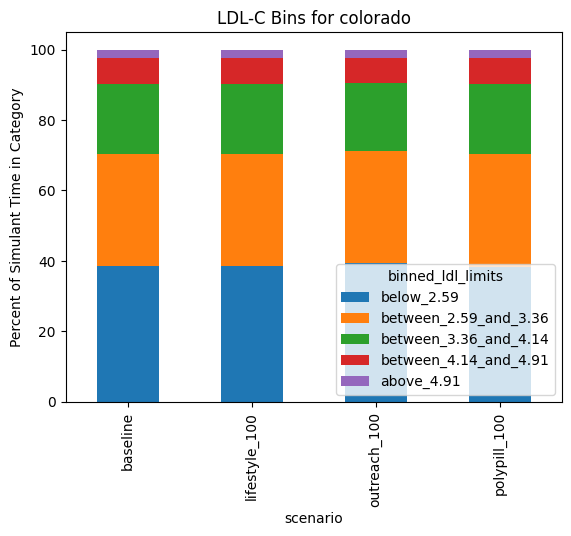

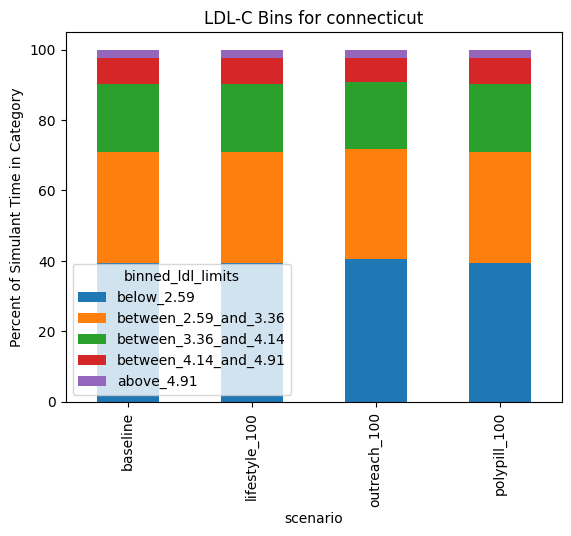

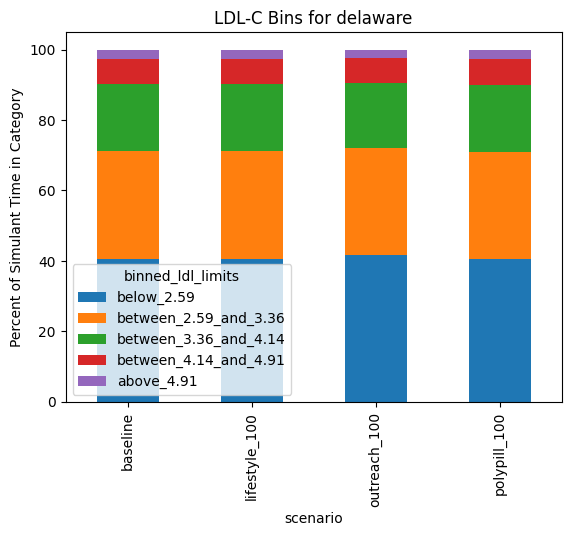

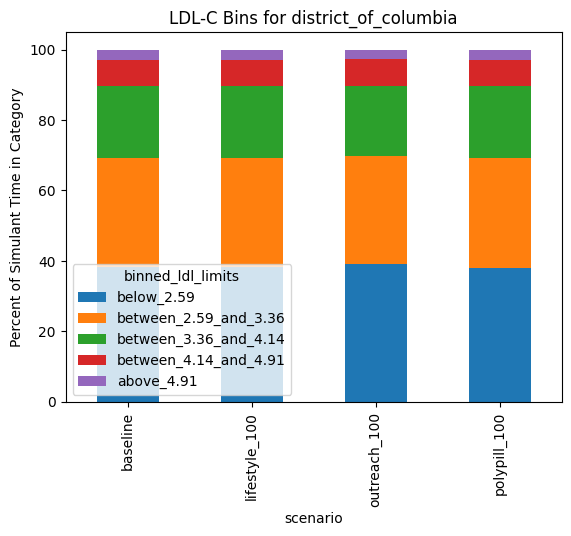

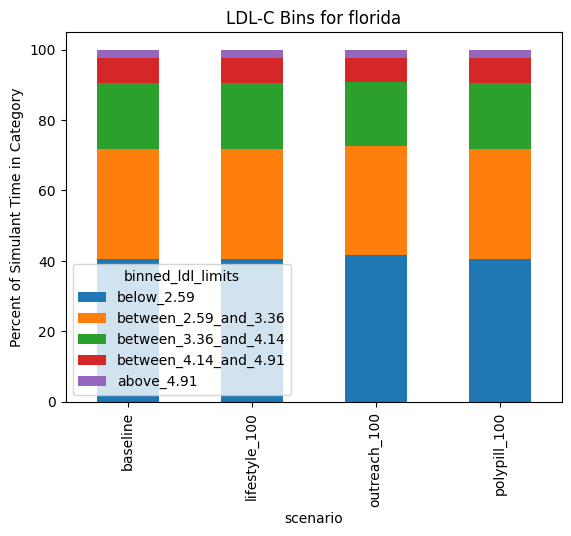

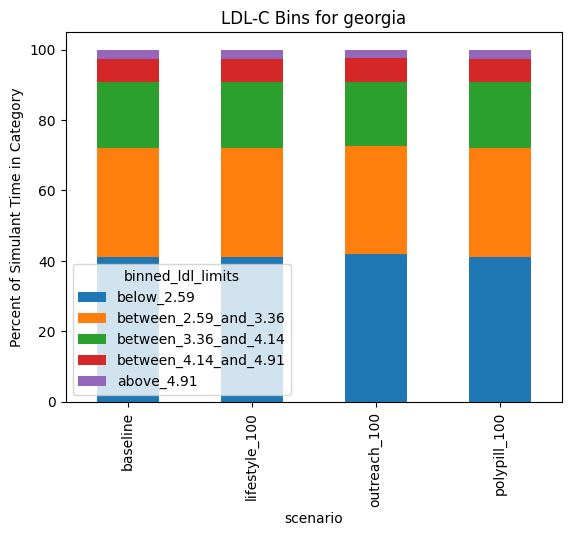

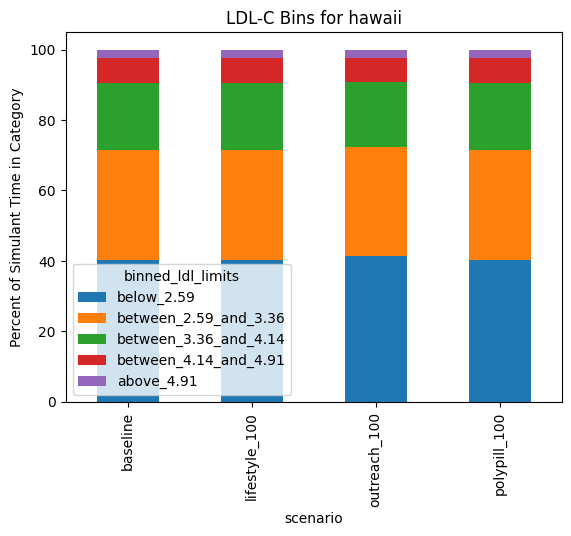

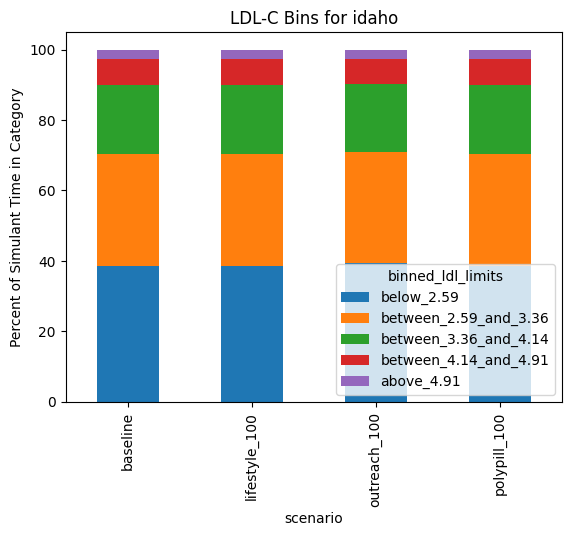

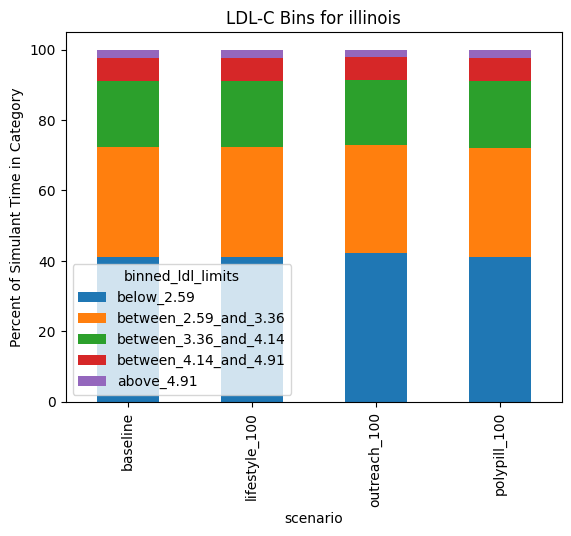

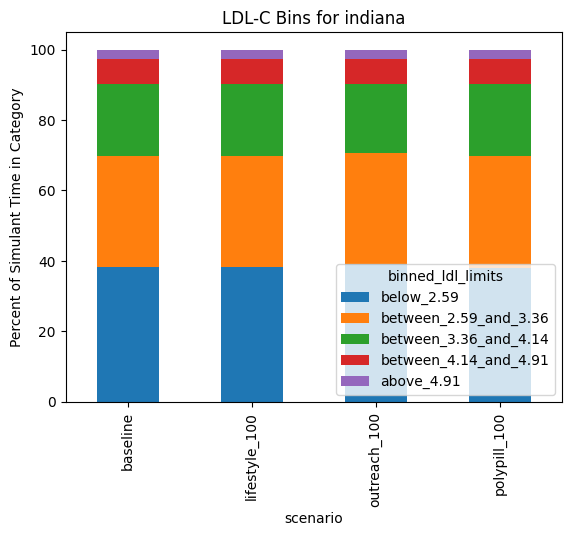

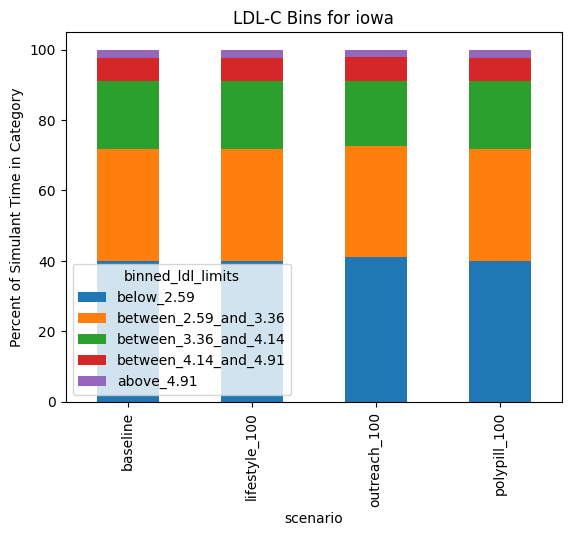

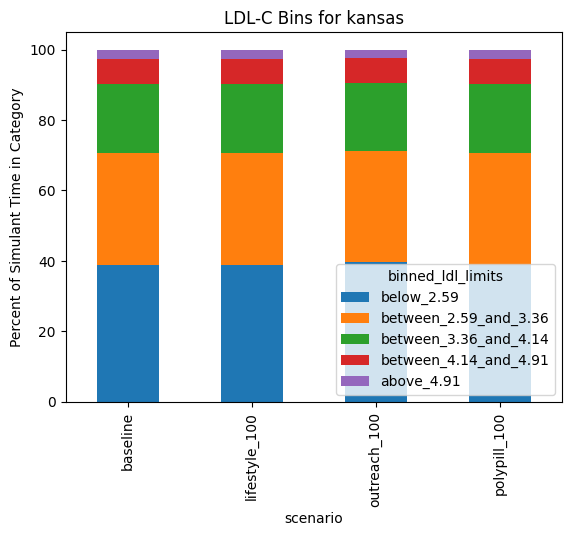

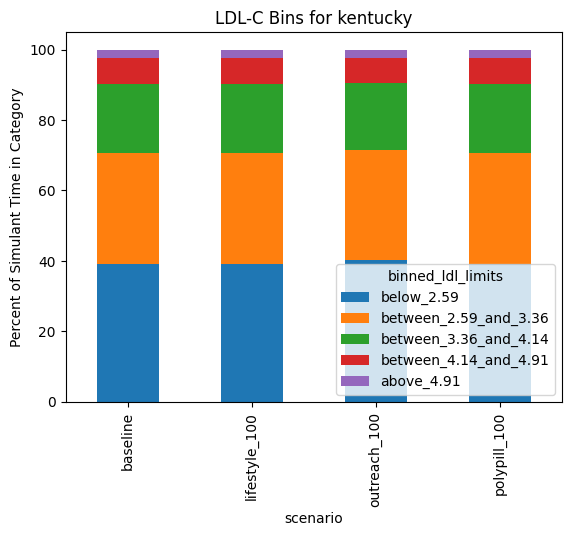

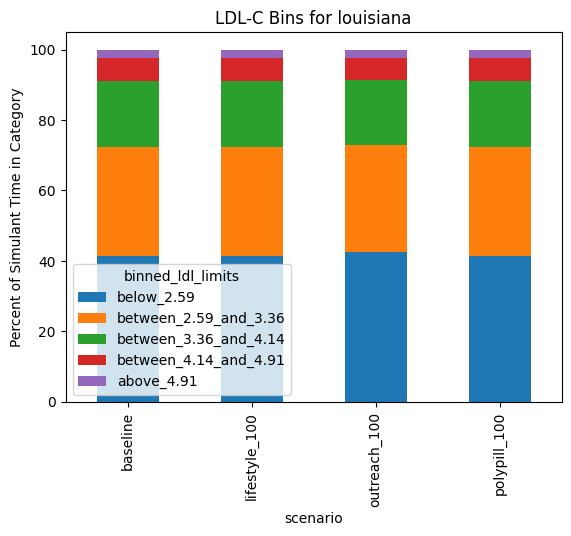

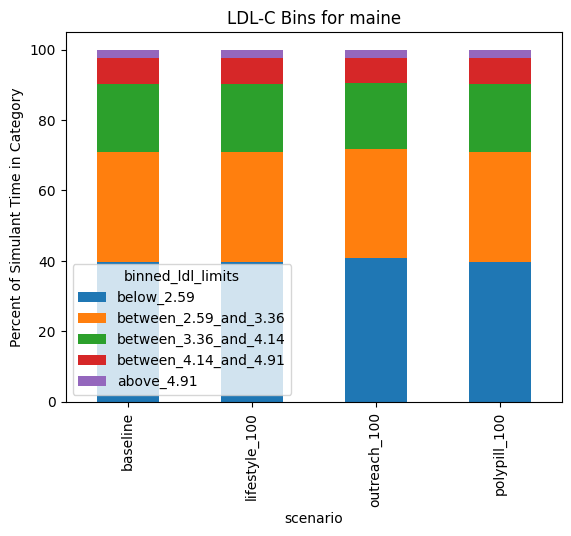

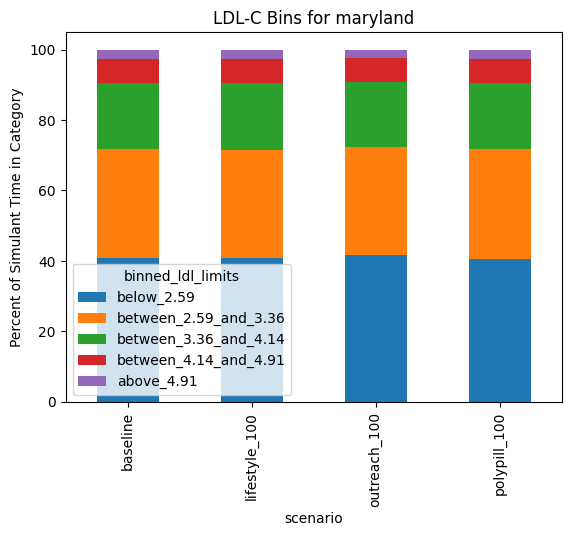

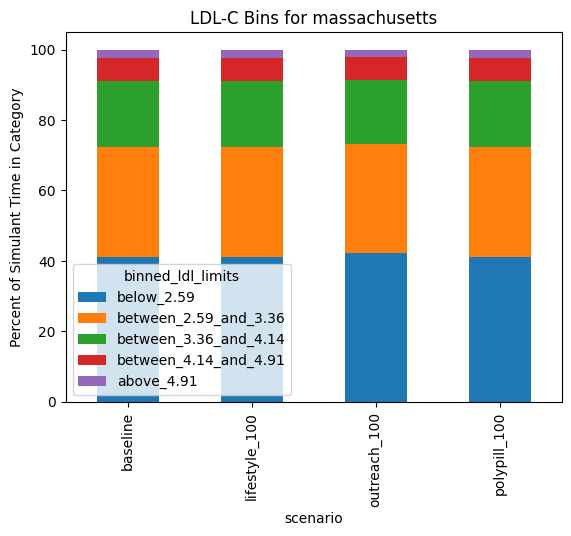

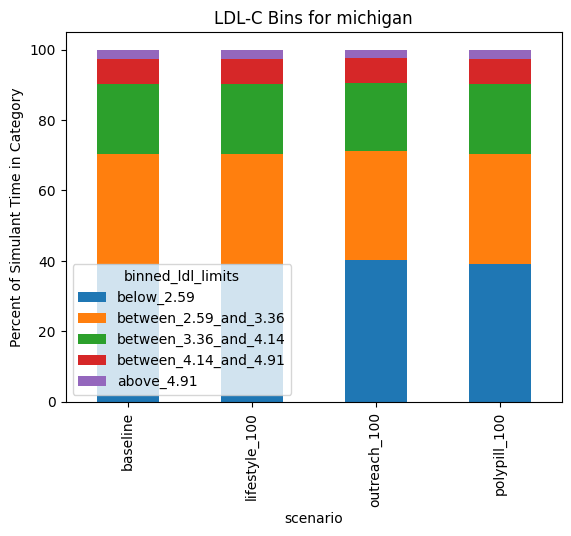

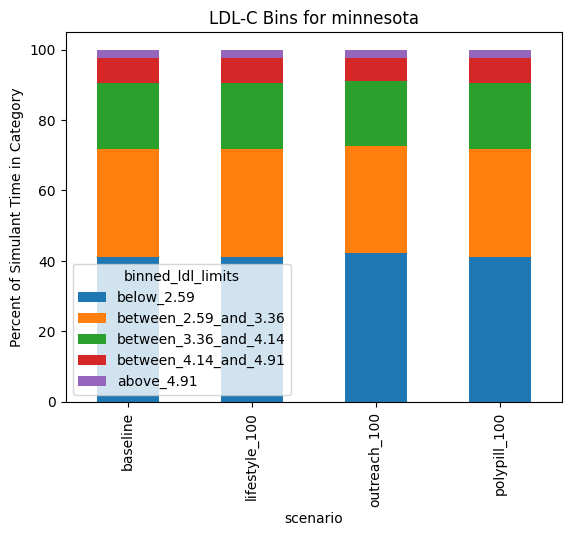

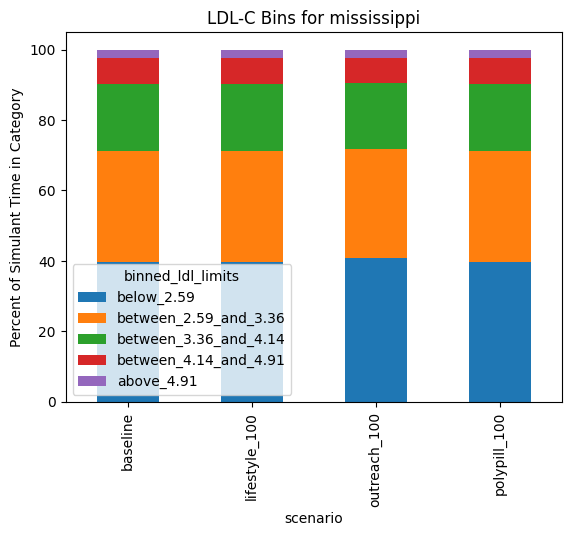

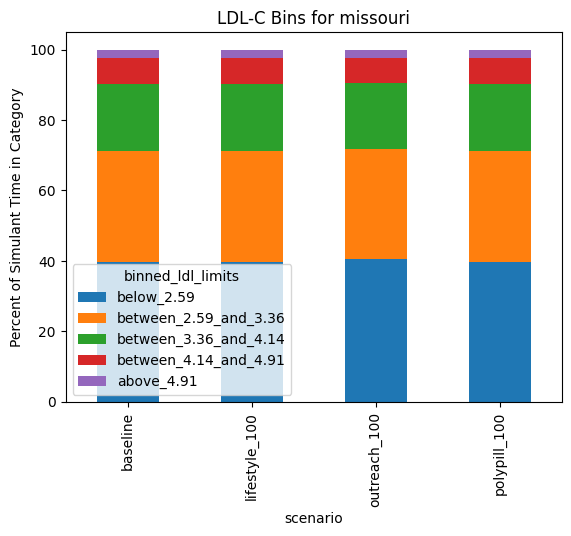

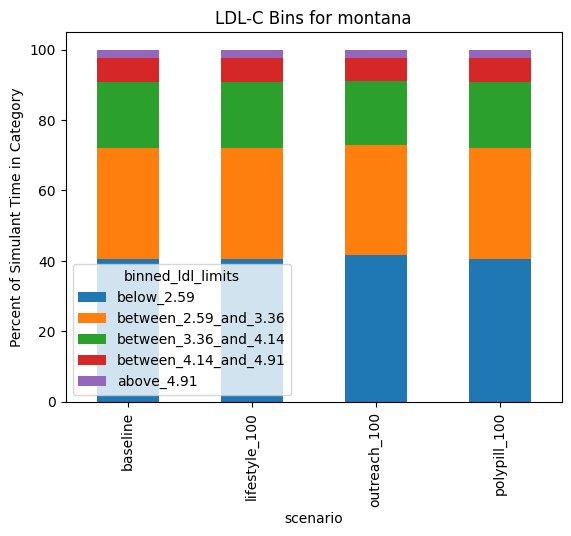

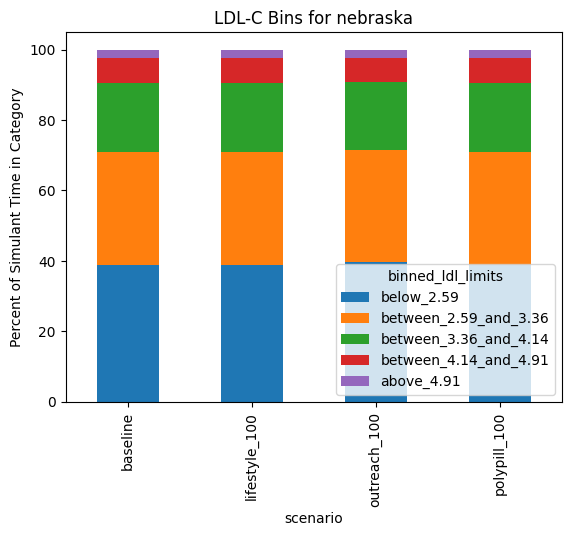

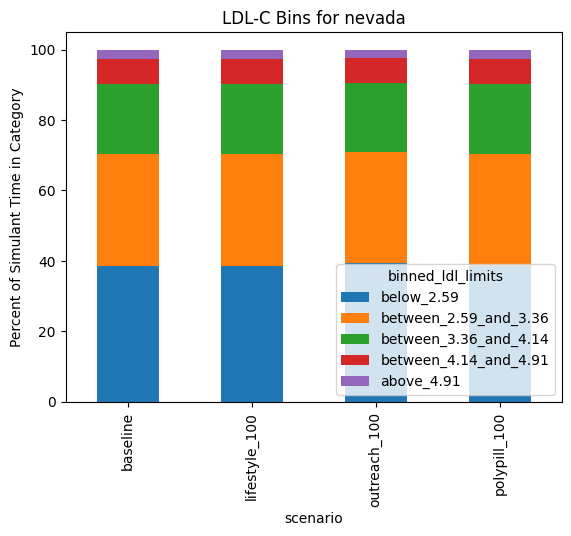

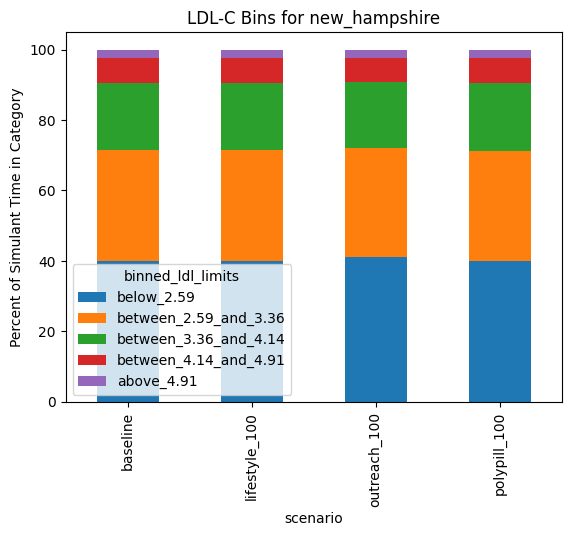

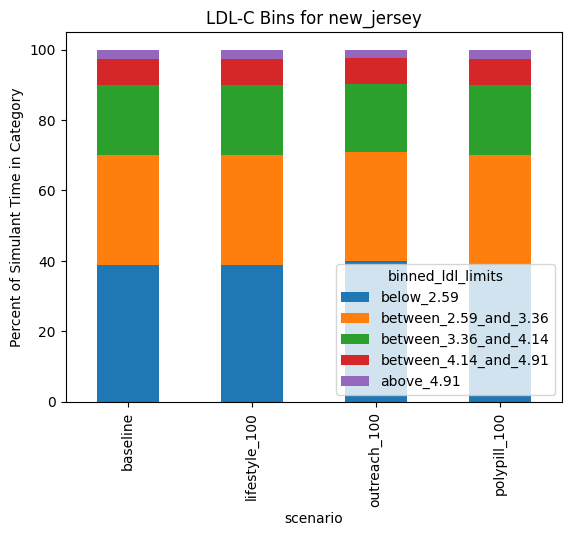

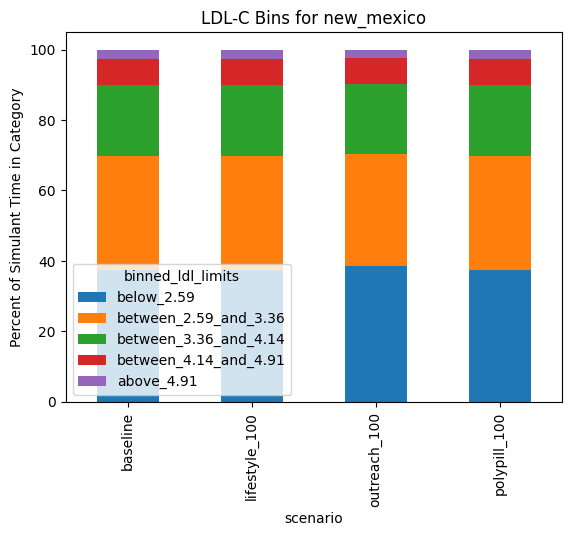

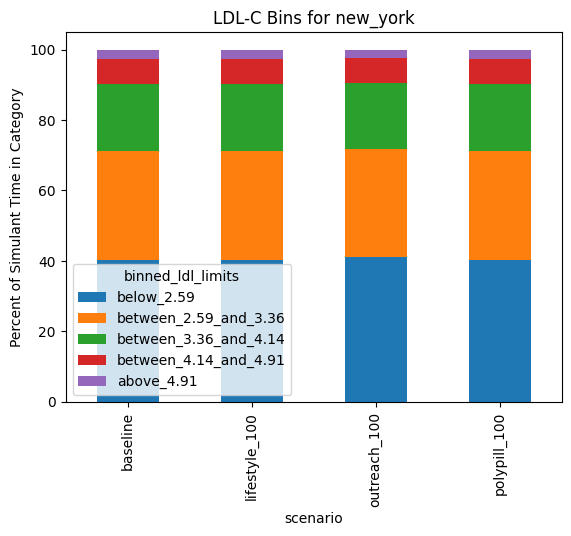

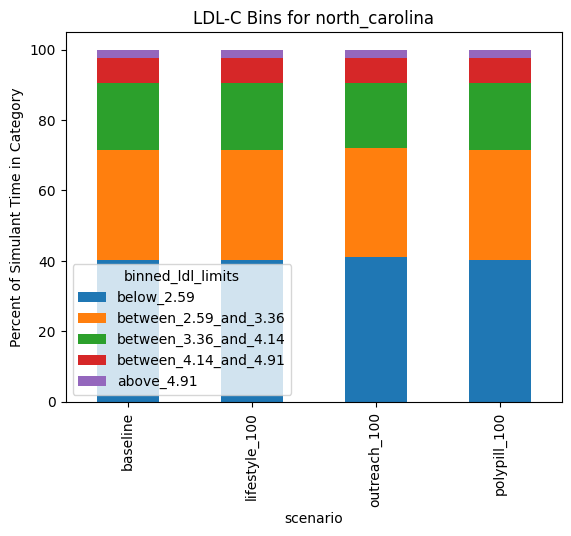

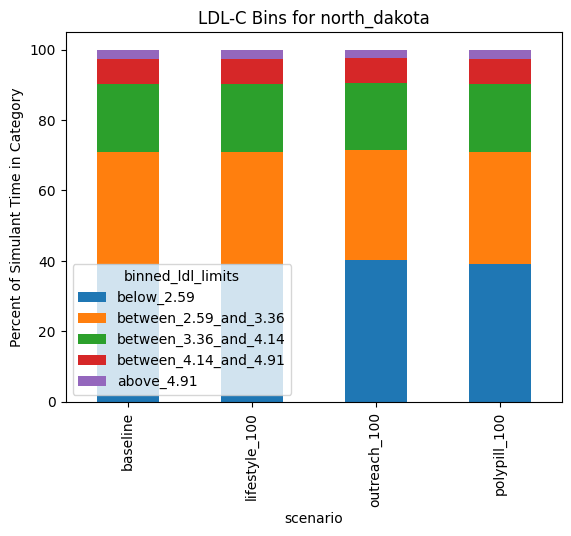

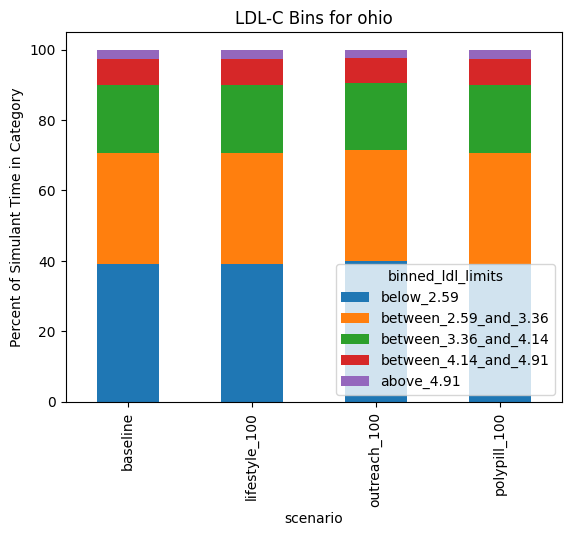

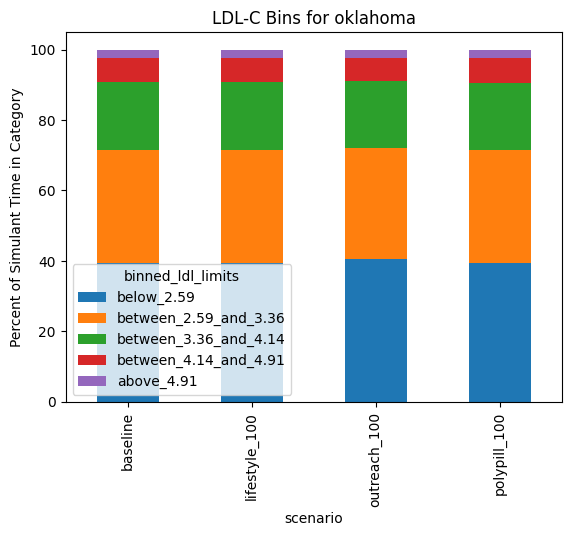

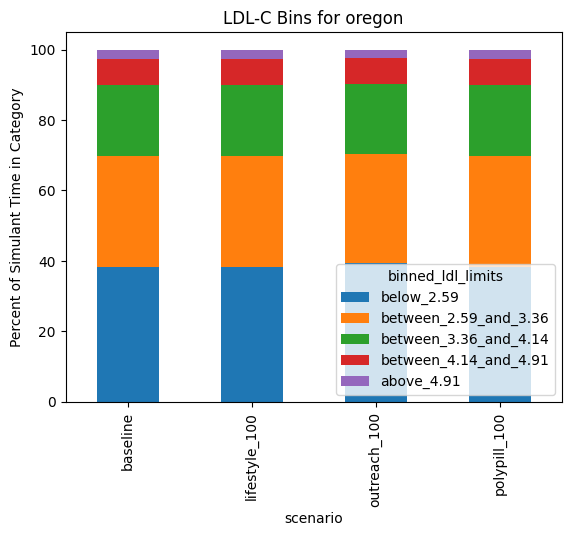

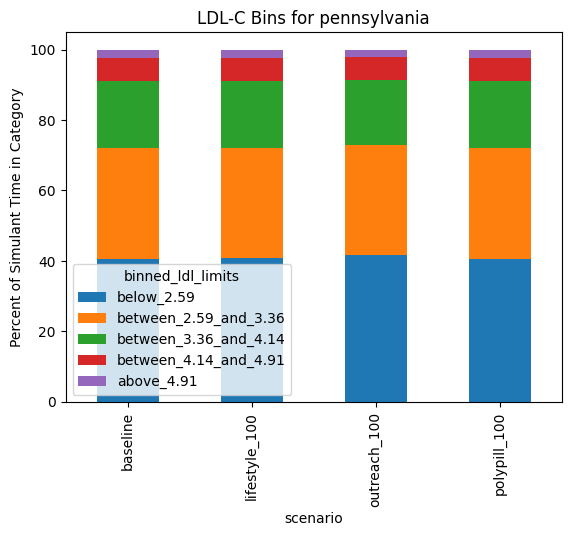

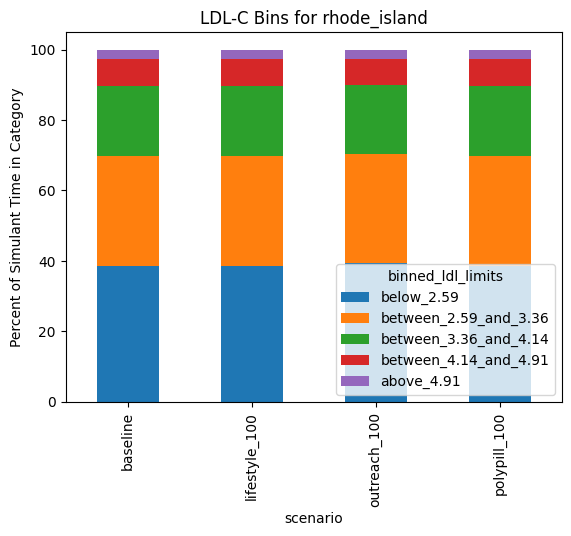

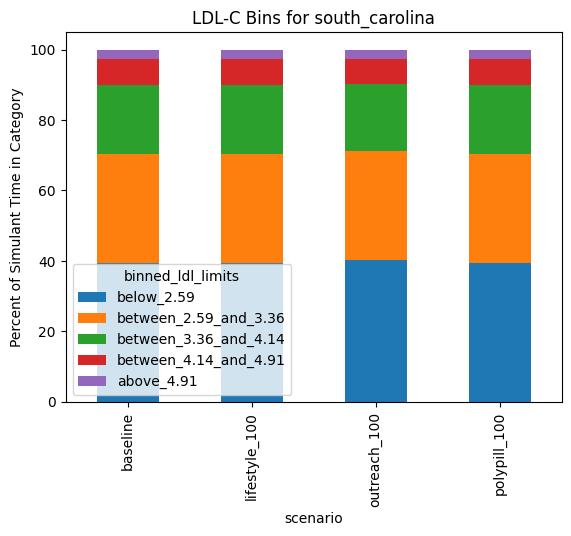

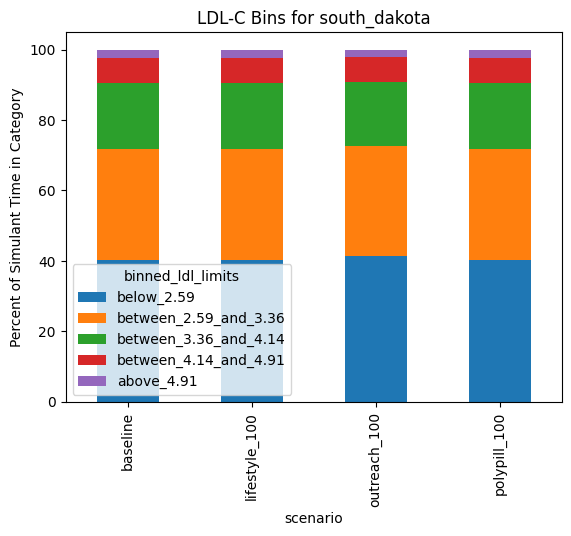

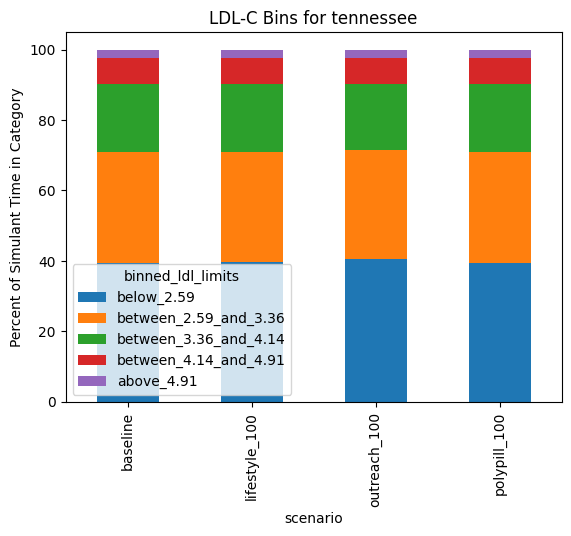

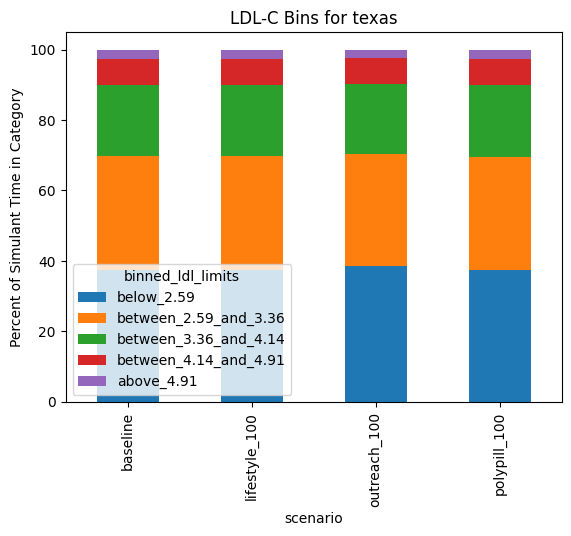

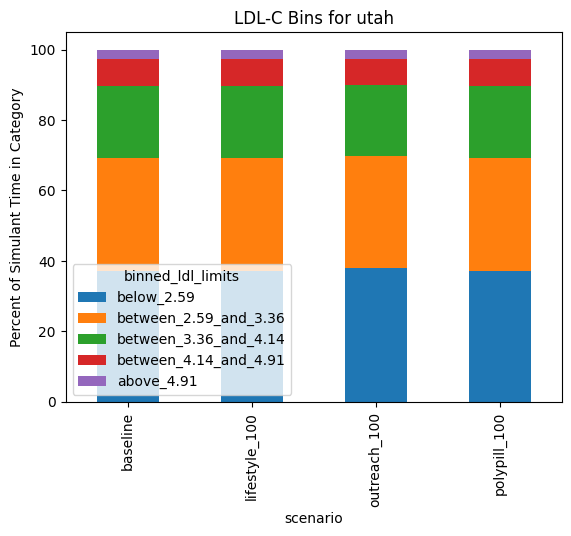

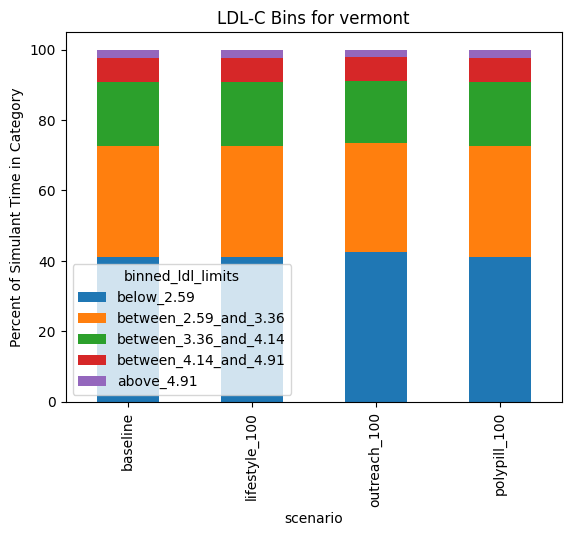

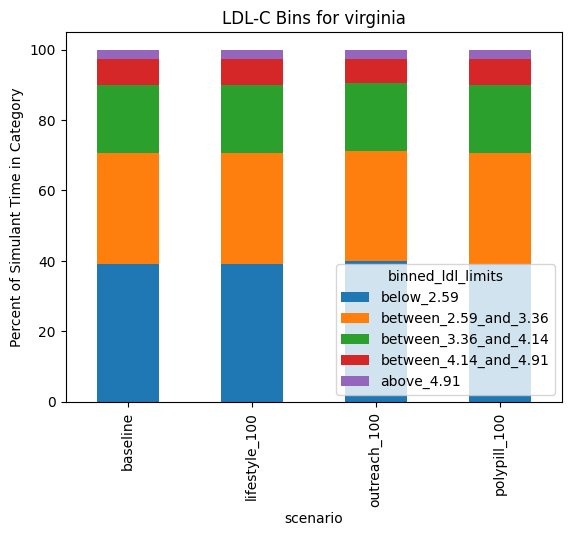

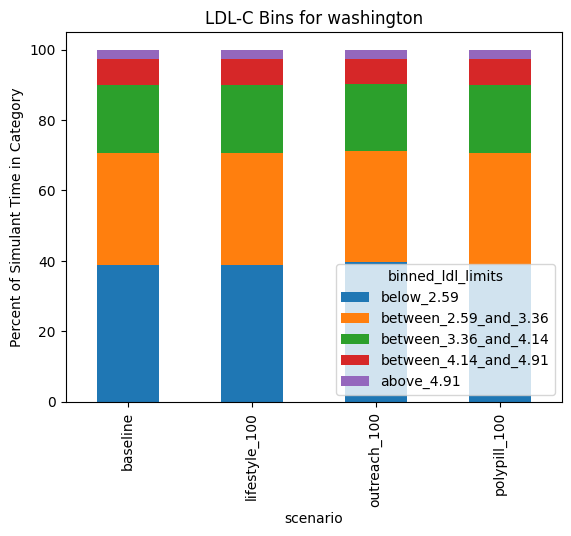

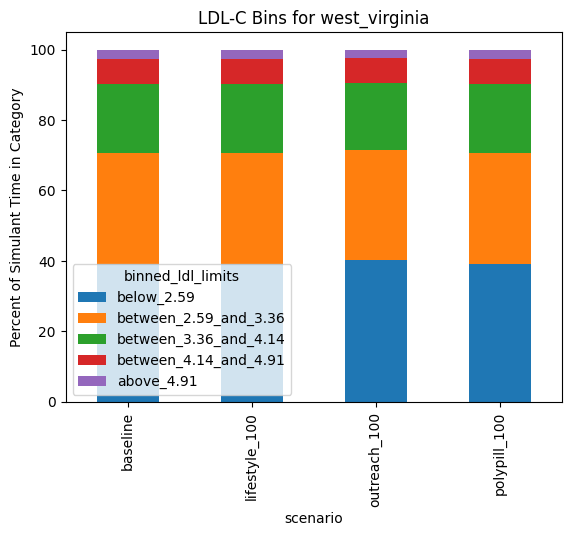

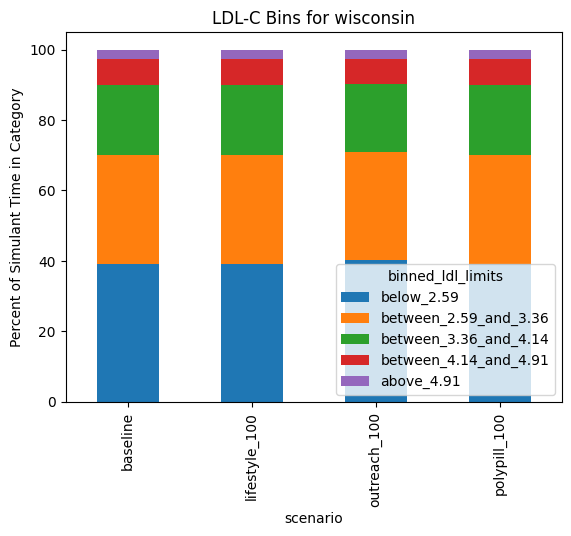

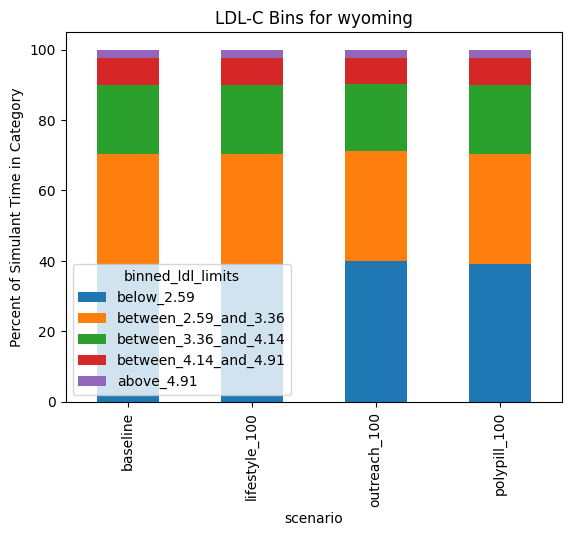

In [6]:
# Plotting
for location in binned_risks_ldl.location.unique():
    subdata = binned_risks_ldl.loc[binned_risks_ldl.location == location]
    pivot_df = subdata.pivot(index='scenario', columns='binned_ldl_limits', values='value')
    
    column_order = ['below_2.59', 'between_2.59_and_3.36', 'between_3.36_and_4.14', 'between_4.14_and_4.91', 'above_4.91']
    pivot_df = pivot_df[column_order]

    # Calculate the total for each category
    totals = [a+b+c+d+e for a,b,c,d,e in zip(pivot_df['below_2.59'], pivot_df['between_2.59_and_3.36'], pivot_df['between_3.36_and_4.14'], pivot_df['between_4.14_and_4.91'], pivot_df['above_4.91'])]

    # Normalize the data to make each category sum to 100%
    pivot_df['below_2.59'] = [a/total*100 for a,total in zip(pivot_df['below_2.59'], totals)]
    pivot_df['between_2.59_and_3.36'] = [b/total*100 for b,total in zip(pivot_df['between_2.59_and_3.36'], totals)]
    pivot_df['between_3.36_and_4.14'] = [c/total*100 for c,total in zip(pivot_df['between_3.36_and_4.14'], totals)]
    pivot_df['between_4.14_and_4.91'] = [d/total*100 for d,total in zip(pivot_df['between_4.14_and_4.91'], totals)]
    pivot_df['above_4.91'] = [e/total*100 for e,total in zip(pivot_df['above_4.91'], totals)]

    fig, ax = plt.subplots()

    pivot_df.plot(kind='bar', stacked=True, ax=ax)

    ax.set_ylabel('Percent of Simulant Time in Category')
    ax.set_title(f'LDL-C Bins for {location}')

    plt.show()

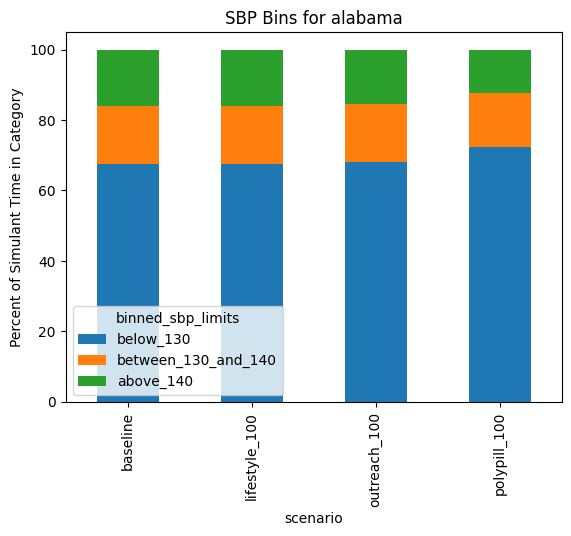

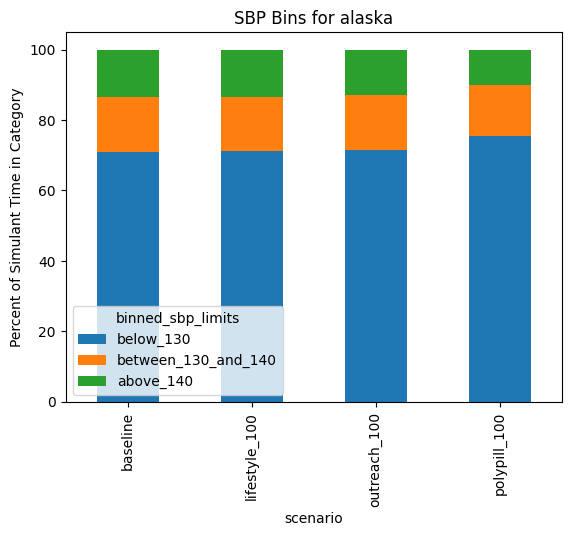

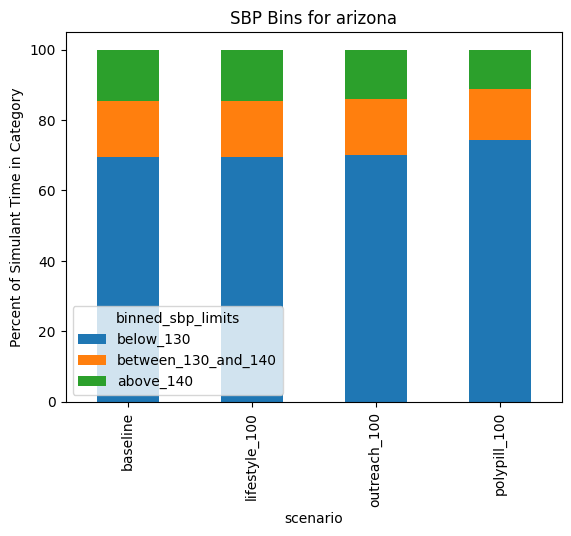

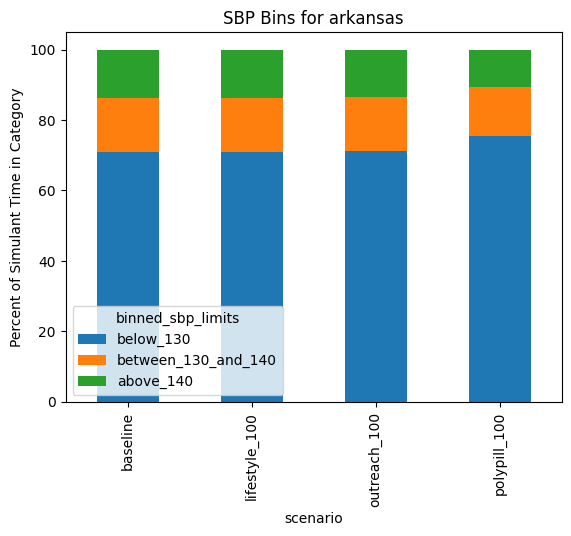

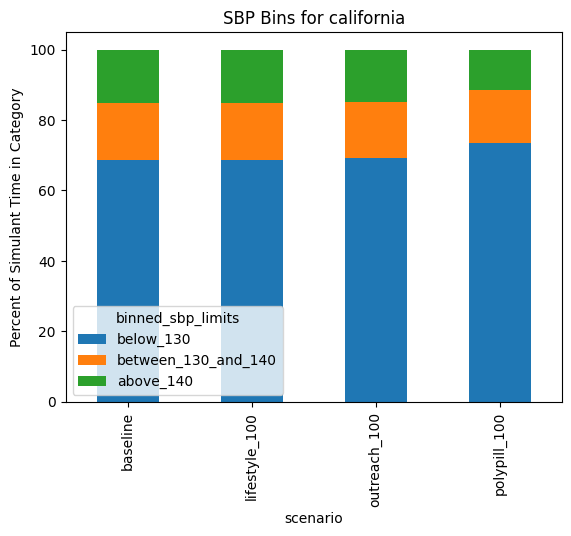

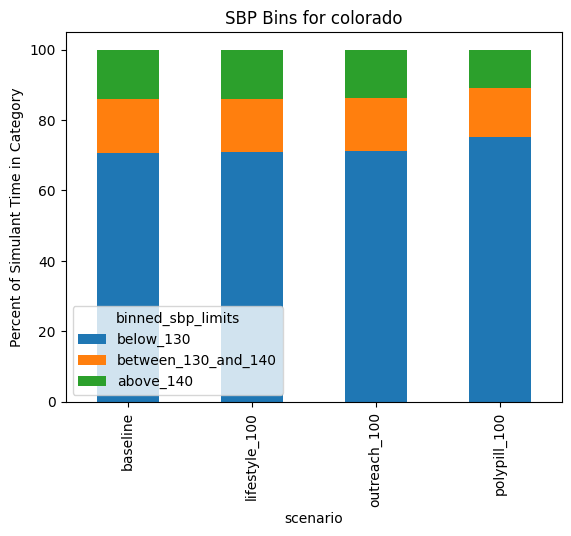

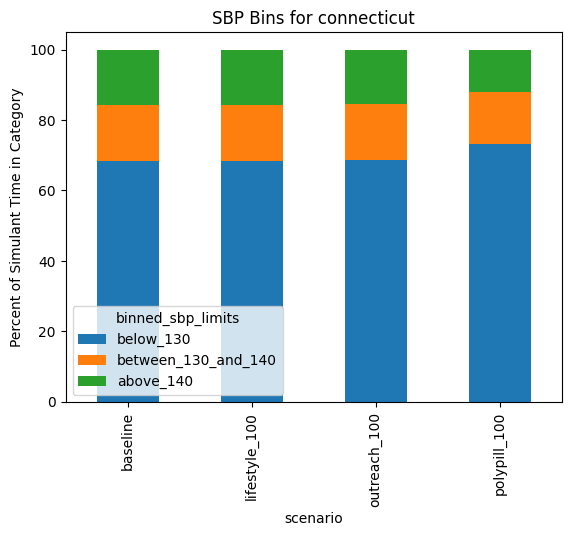

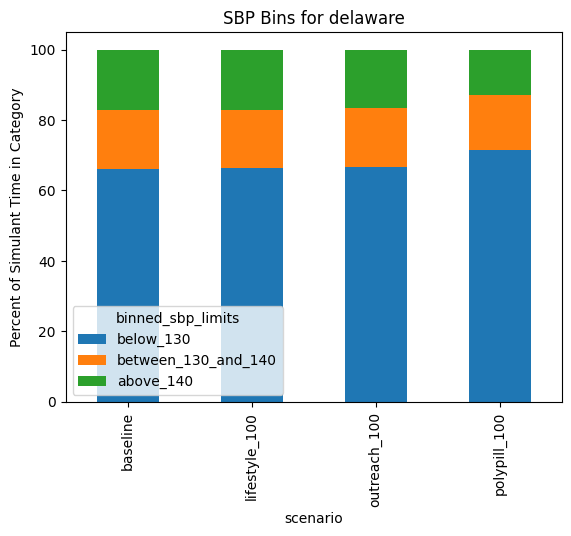

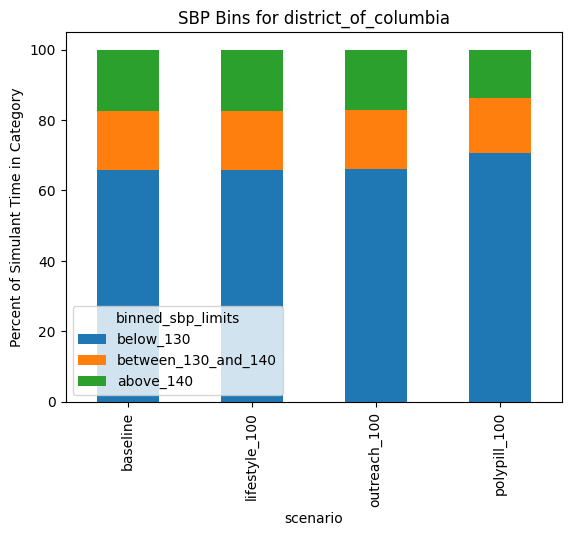

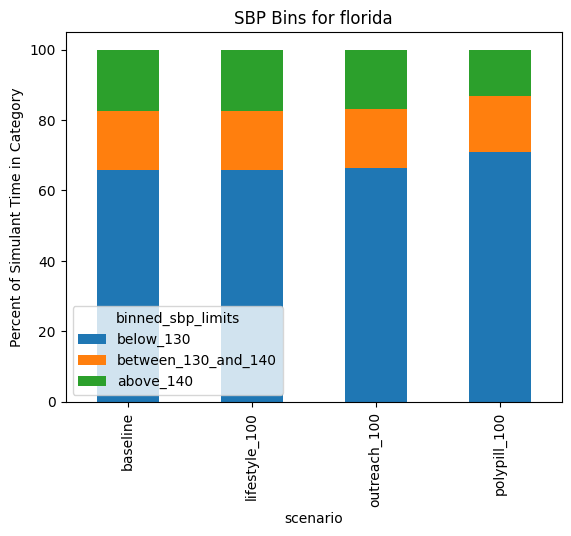

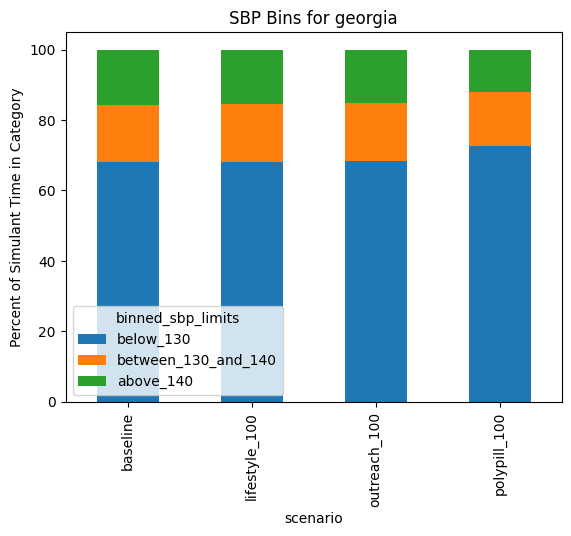

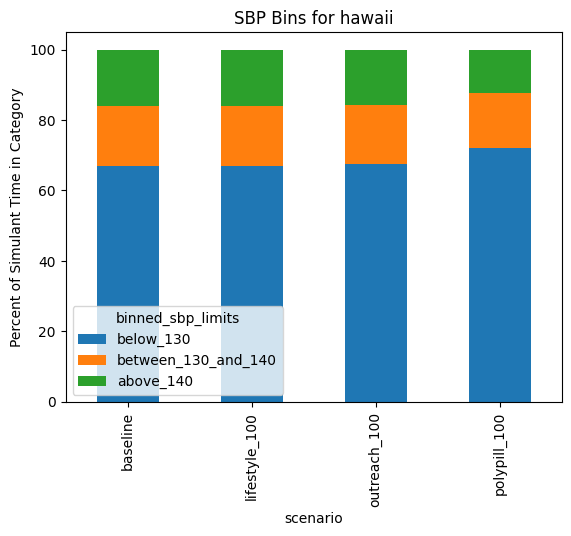

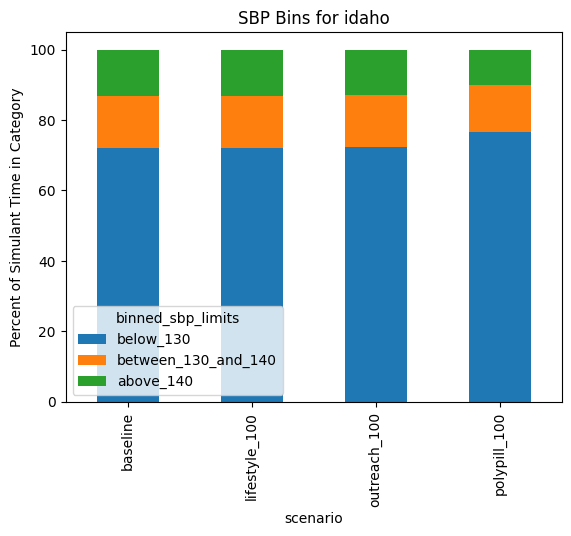

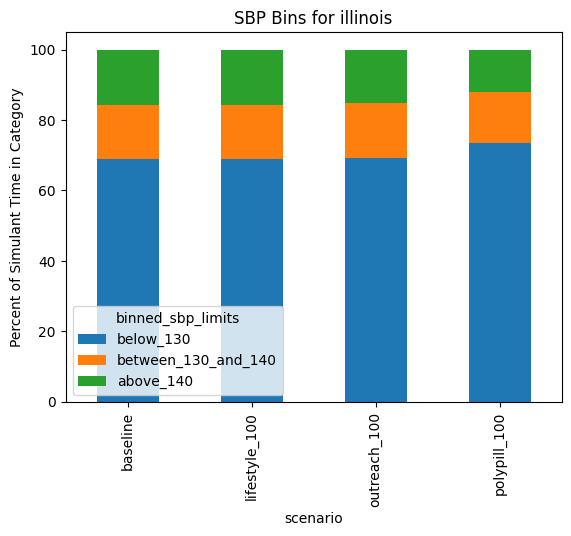

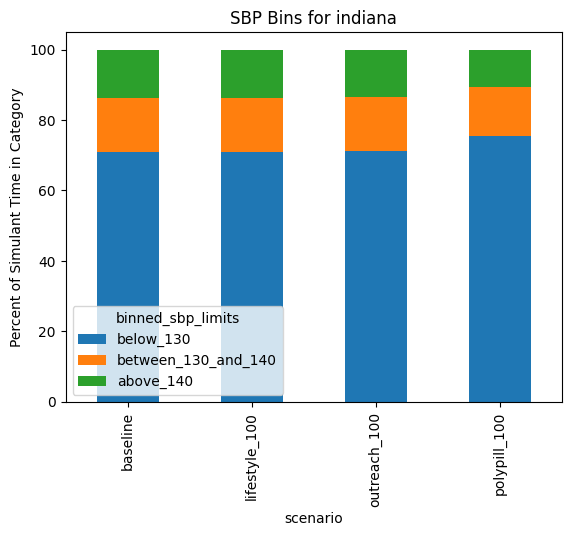

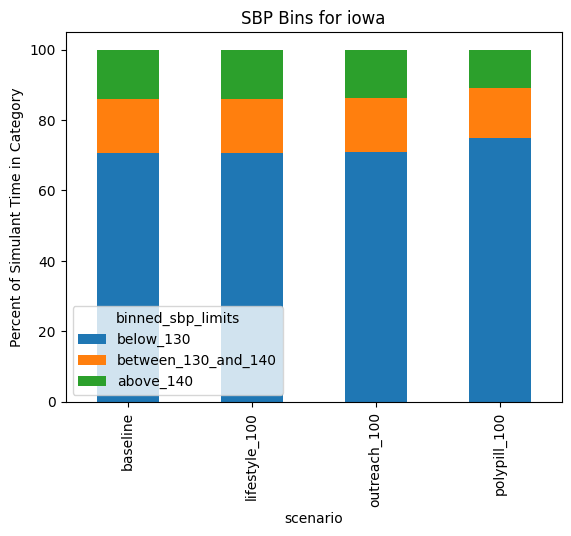

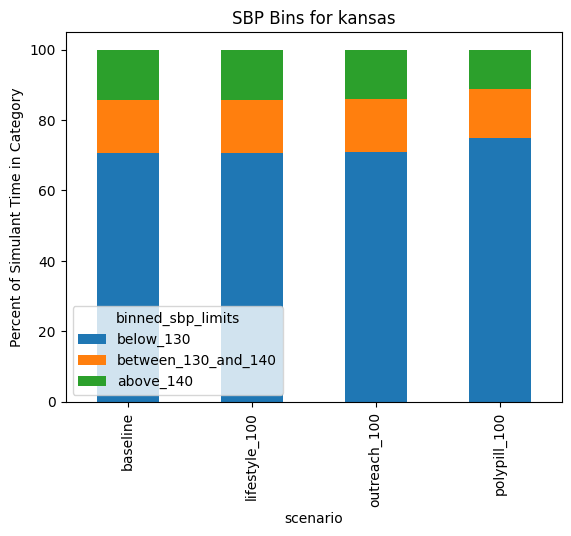

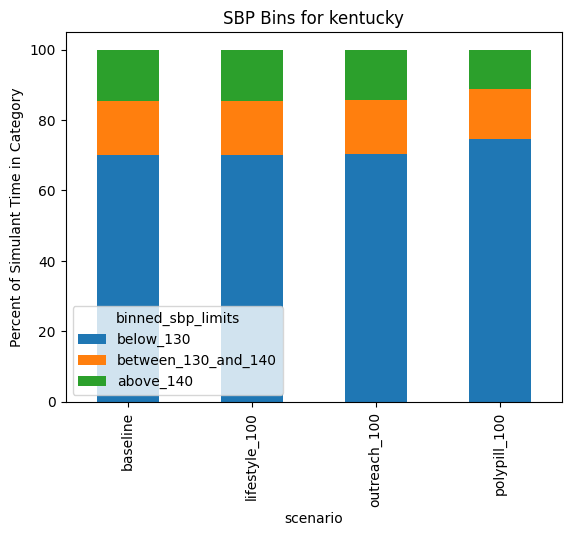

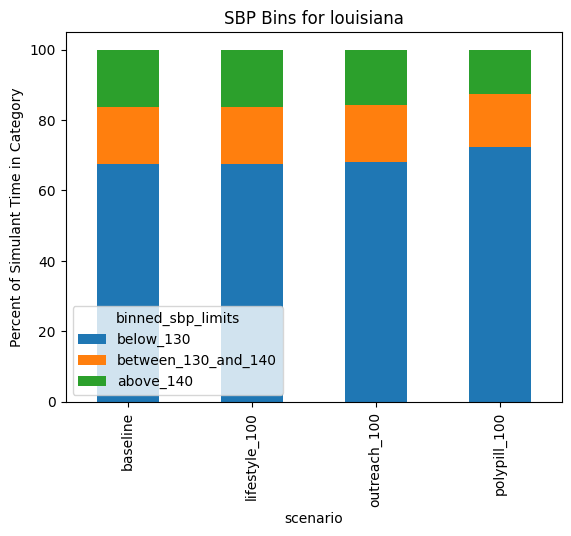

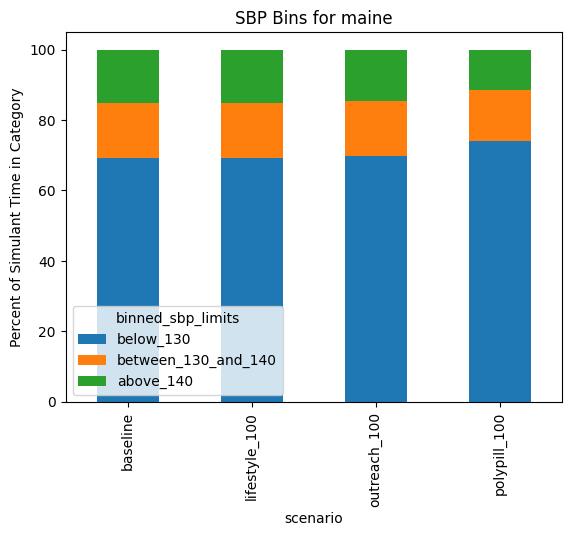

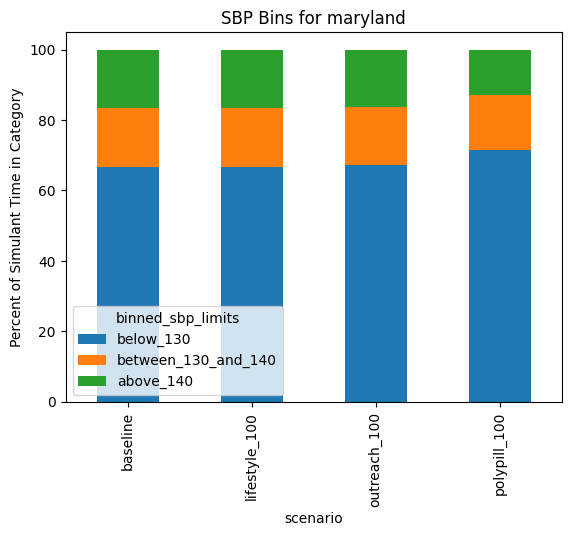

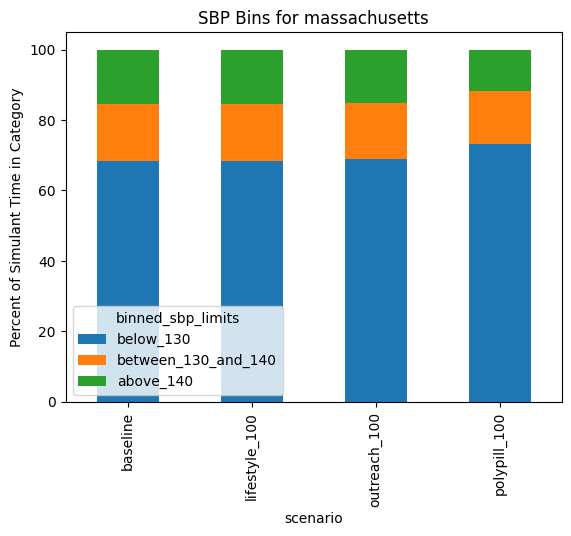

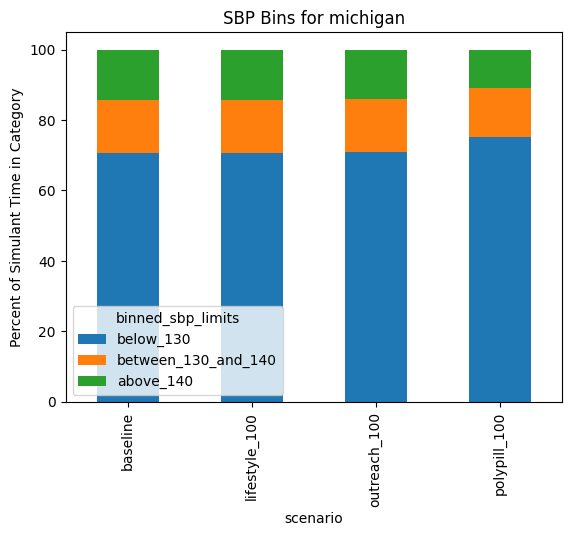

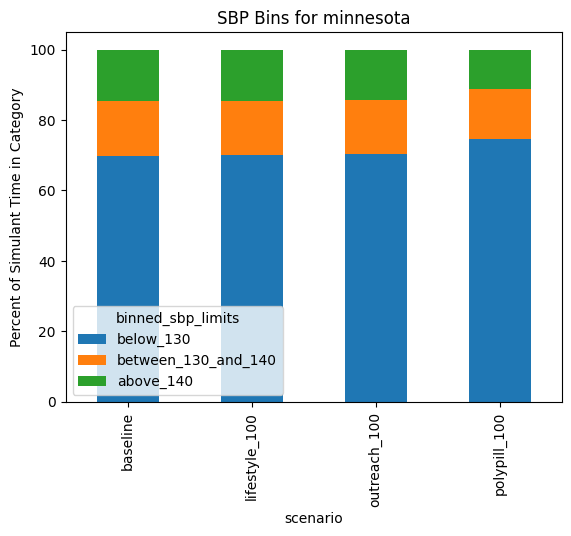

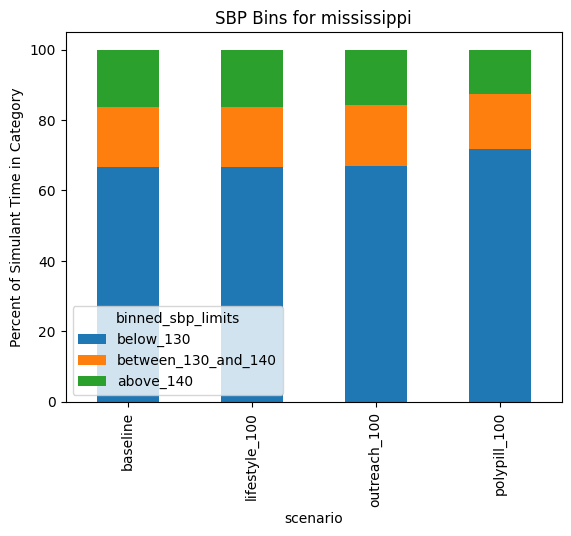

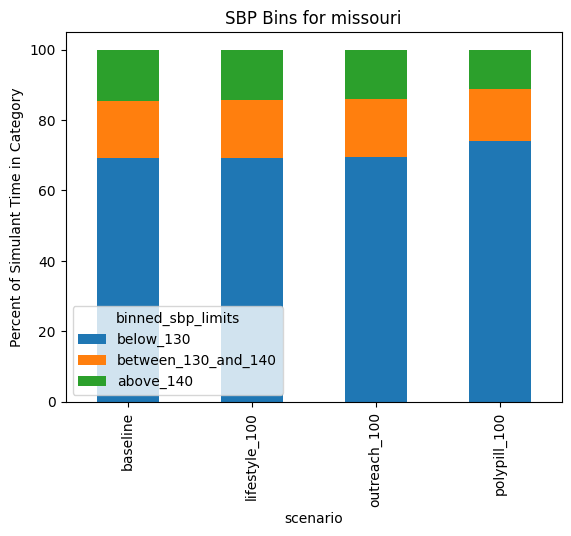

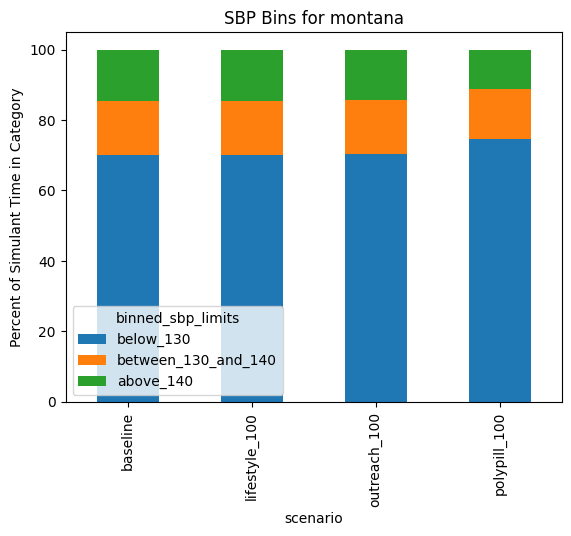

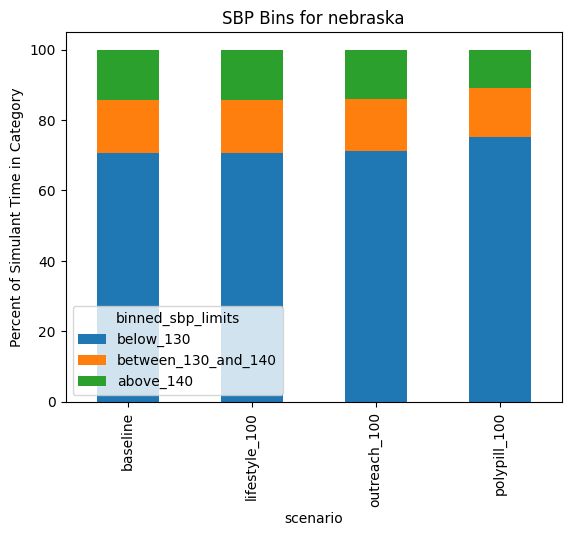

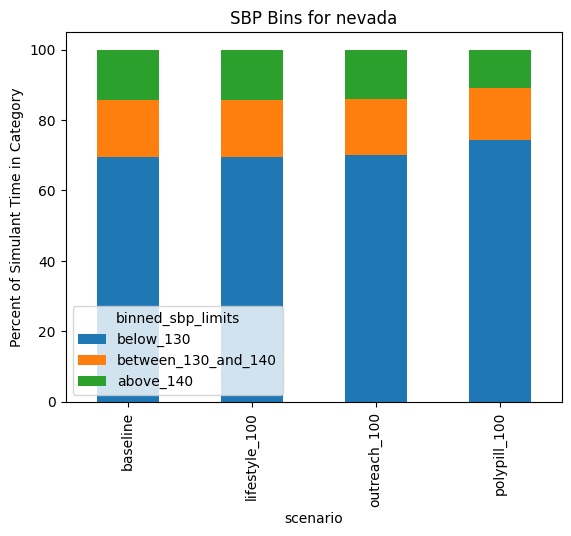

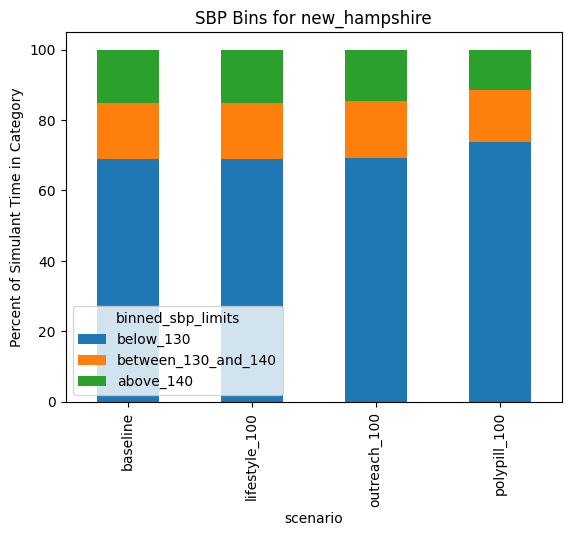

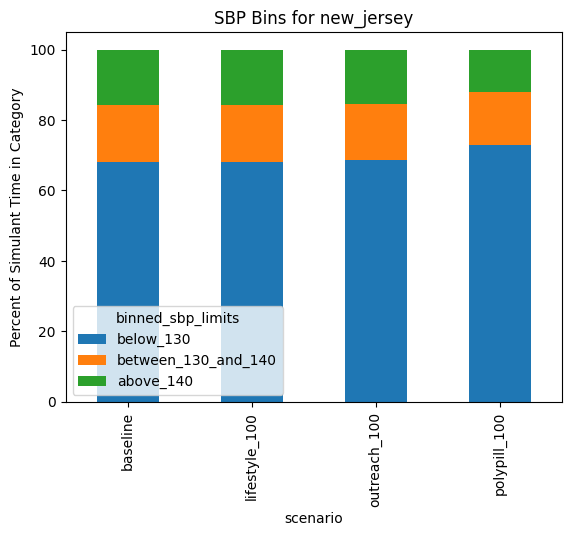

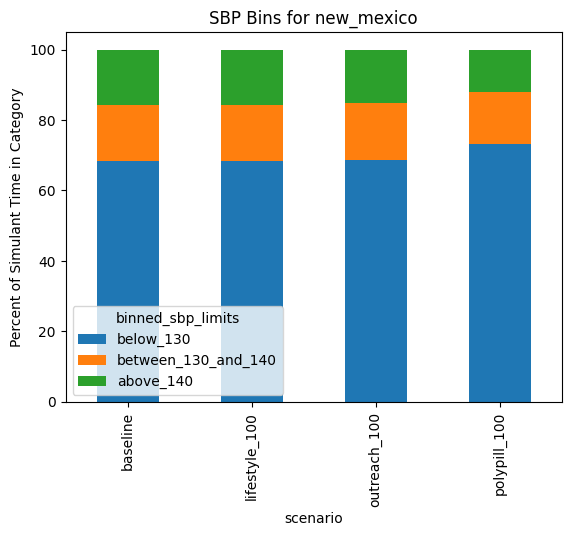

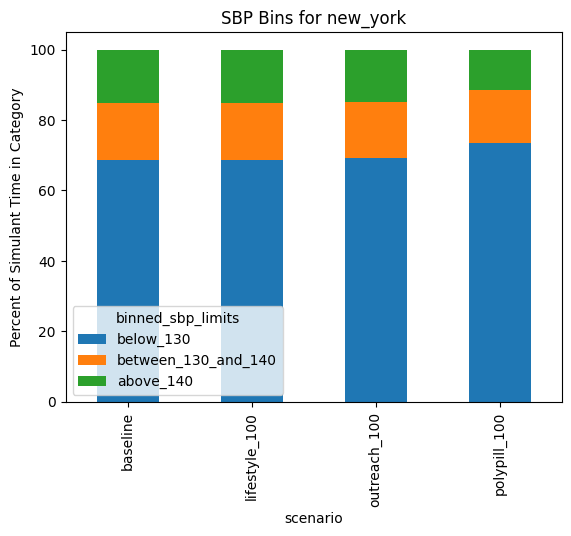

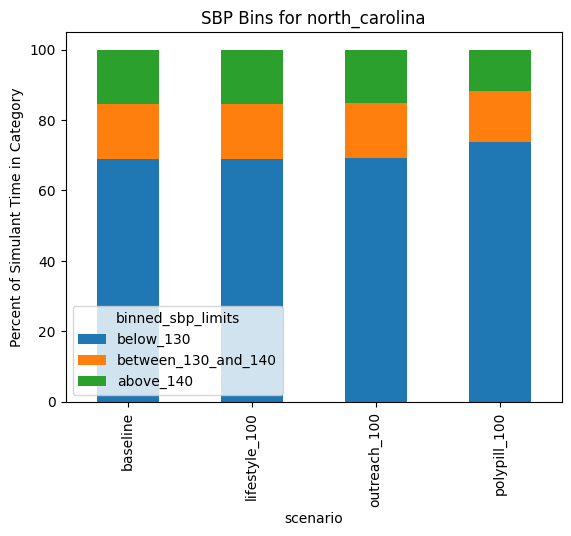

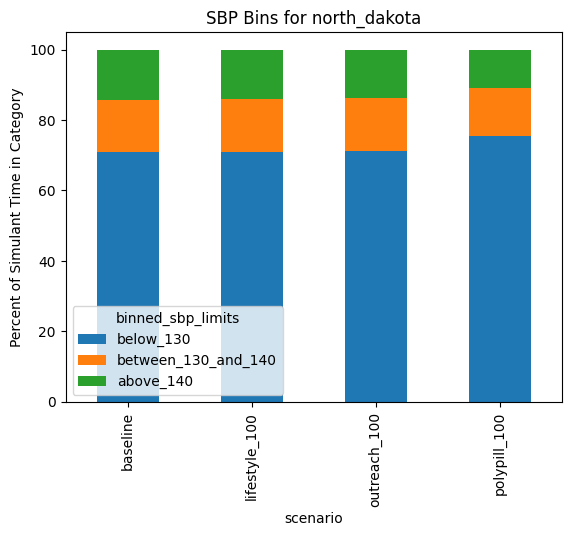

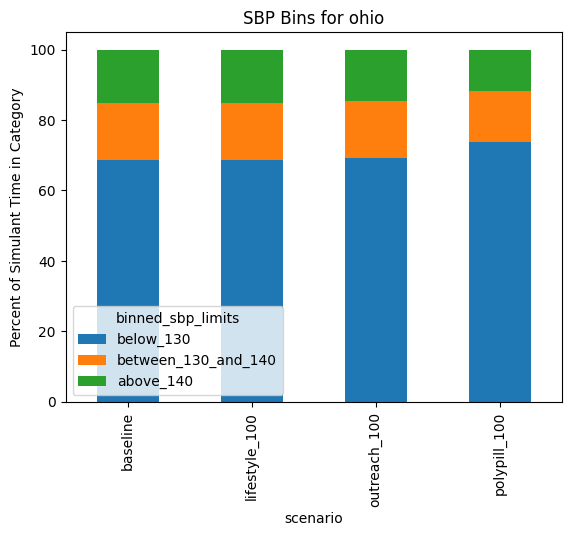

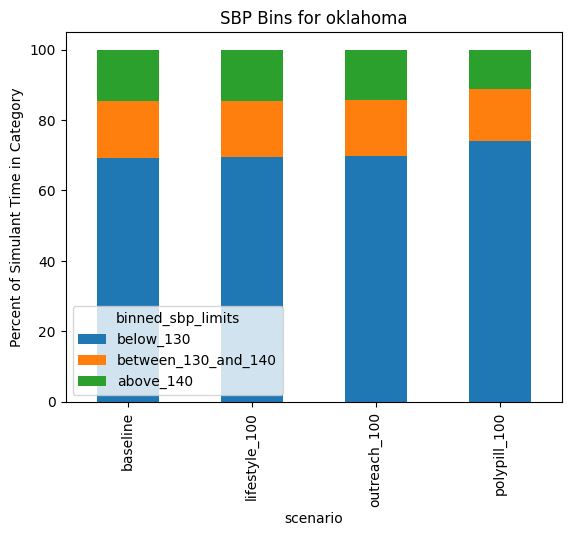

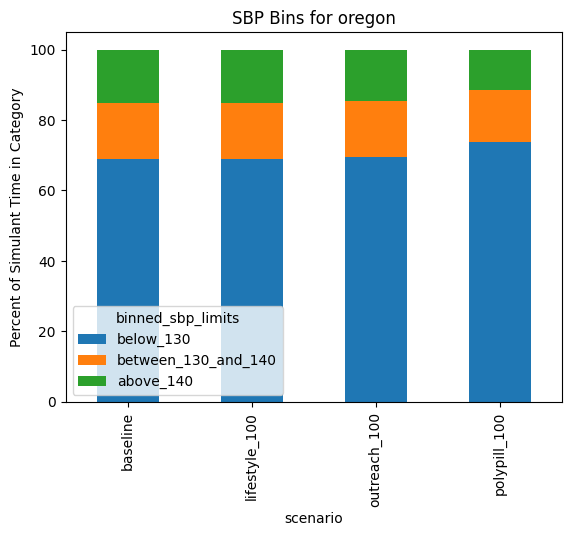

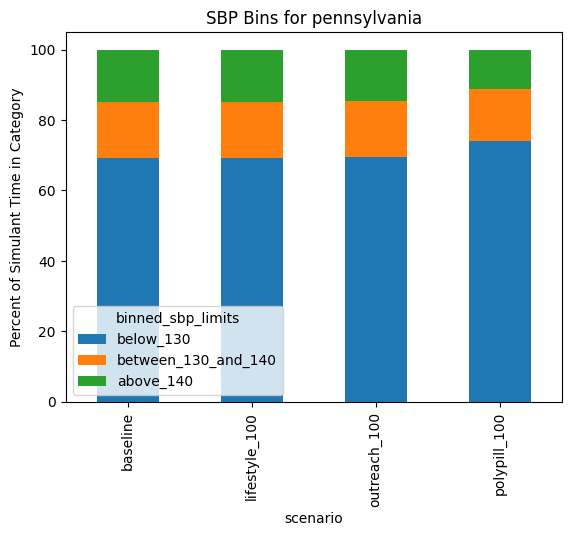

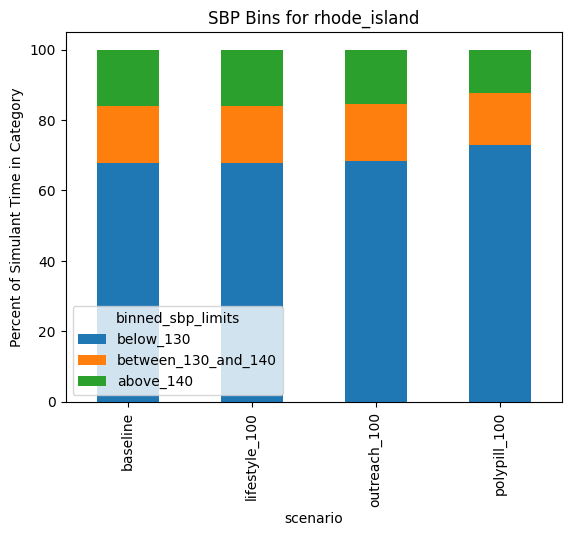

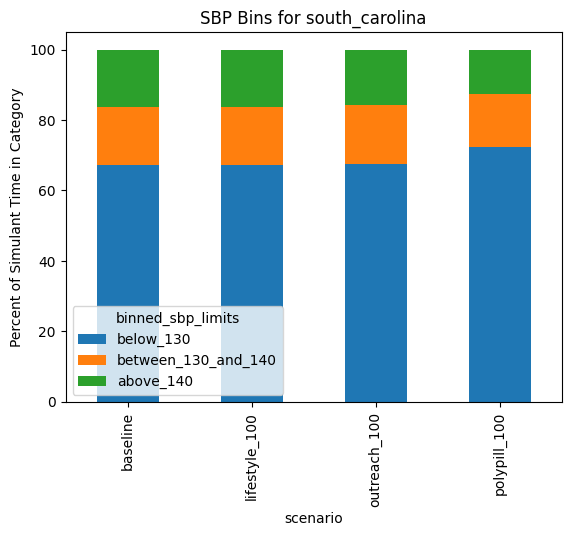

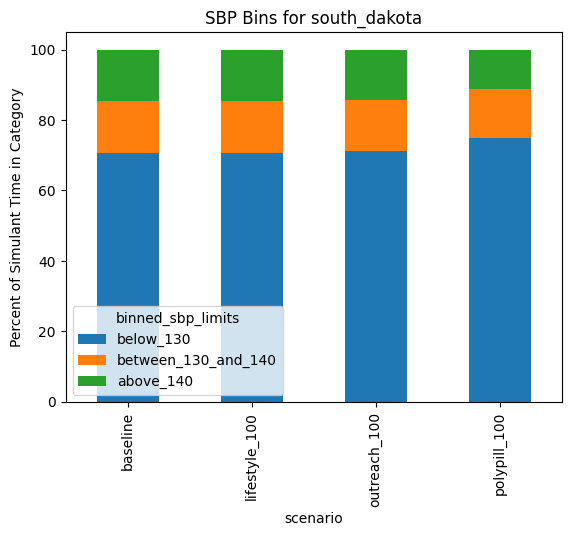

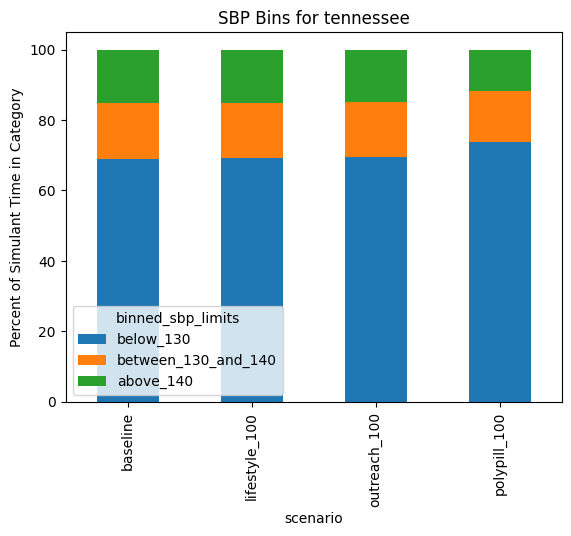

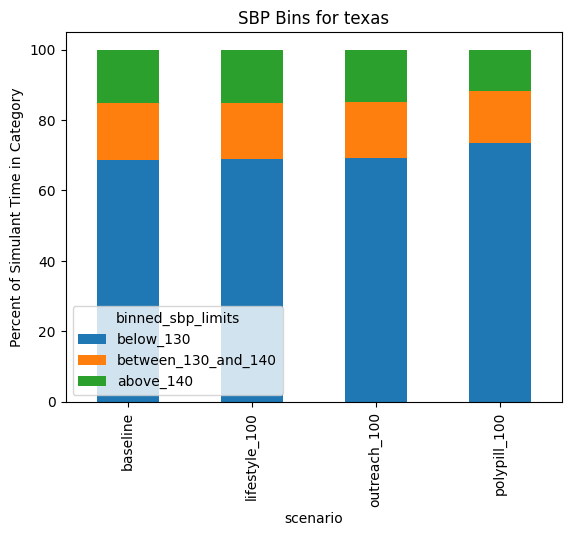

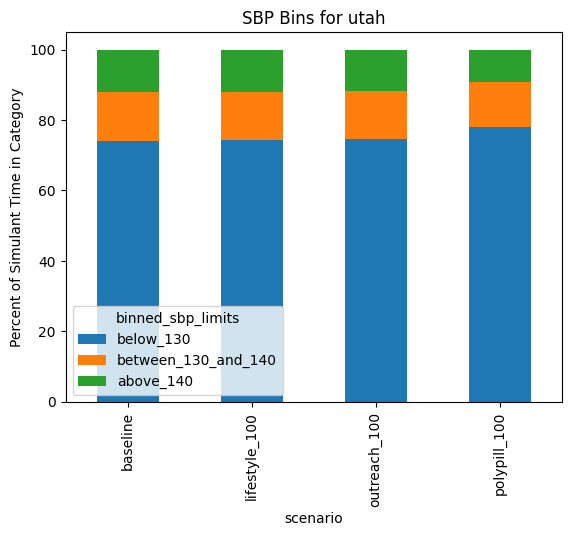

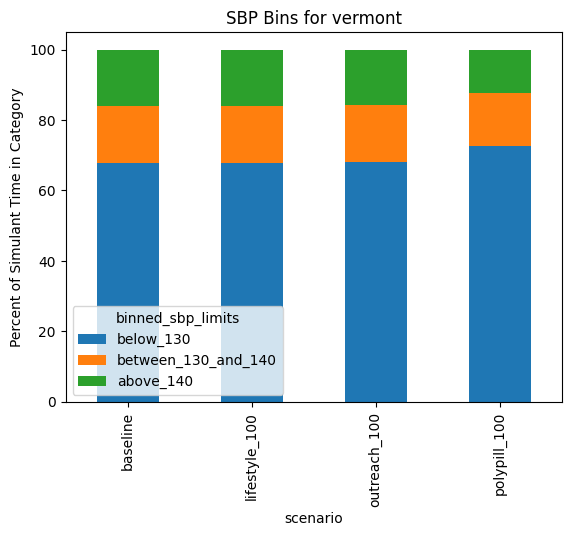

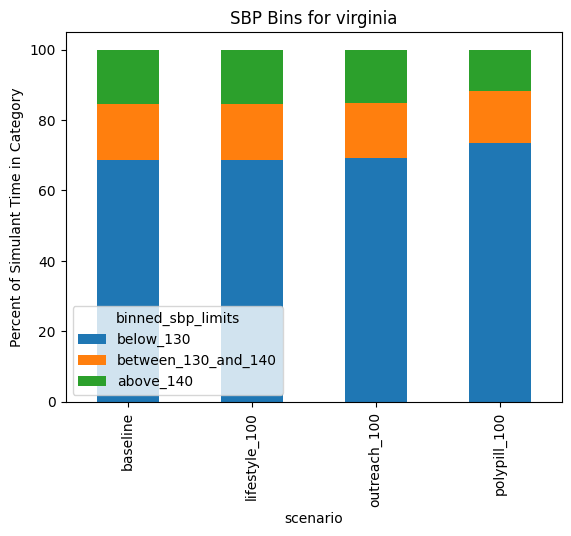

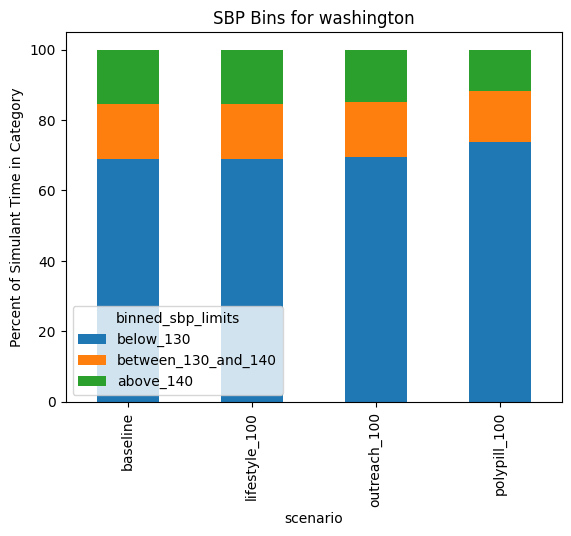

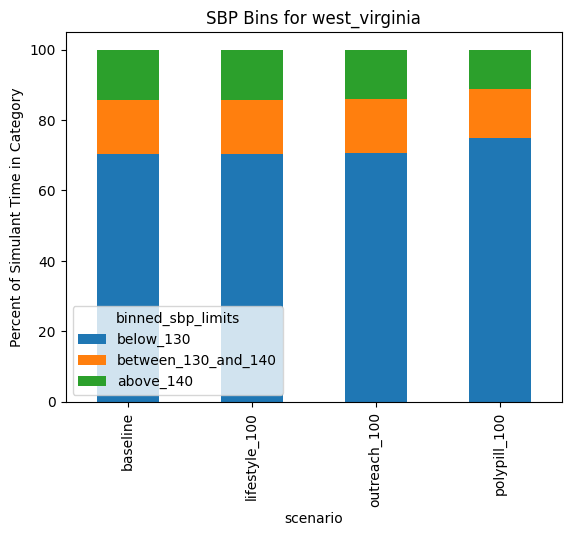

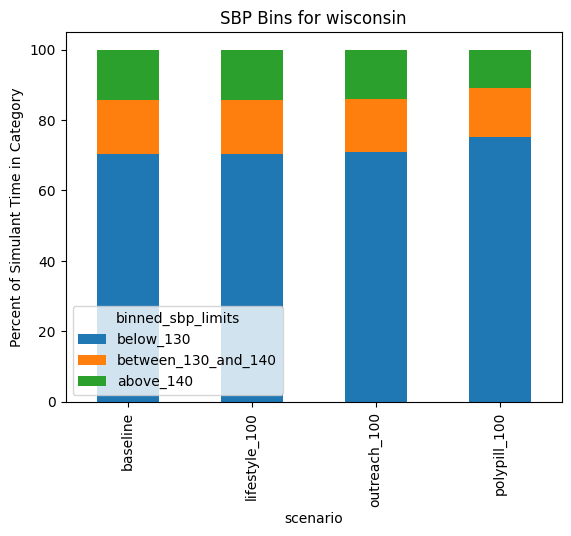

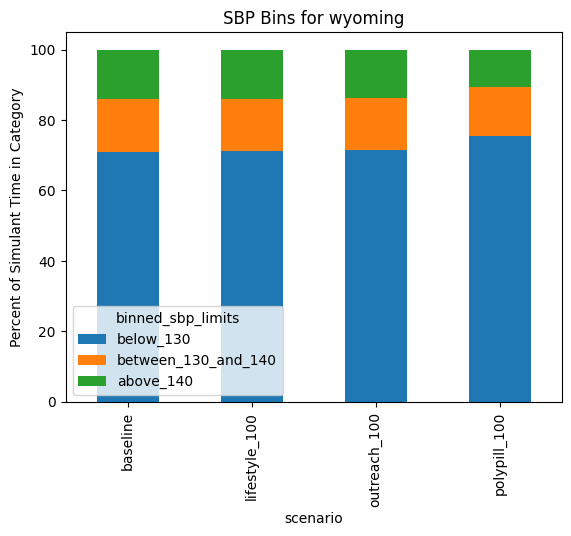

In [7]:
for location in binned_risks_sbp.location.unique():
    subdata = binned_risks_sbp.loc[binned_risks_sbp.location == location]
    pivot_df = subdata.pivot(index='scenario', columns='binned_sbp_limits', values='value')
    
    column_order = ['below_130', 'between_130_and_140', 'above_140']
    pivot_df = pivot_df[column_order]

    # Calculate the total for each category
    totals = [a+b+c for a,b,c in zip(pivot_df['below_130'], pivot_df['between_130_and_140'], pivot_df['above_140'])]

    # Normalize the data to make each category sum to 100%
    pivot_df['below_130'] = [a/total*100 for a,total in zip(pivot_df['below_130'], totals)]
    pivot_df['between_130_and_140'] = [b/total*100 for b,total in zip(pivot_df['between_130_and_140'], totals)]
    pivot_df['above_140'] = [c/total*100 for c,total in zip(pivot_df['above_140'], totals)]

    fig, ax = plt.subplots()

    pivot_df.plot(kind='bar', stacked=True, ax=ax)

    ax.set_ylabel('Percent of Simulant Time in Category')
    ax.set_title(f'SBP Bins for {location}')

    plt.show()

In [8]:
binned_risks_ldl = pd.read_csv(sim_results_dir + 'binned_ldl_exposure_time.csv')
binned_risks_ldl = binned_risks_ldl.groupby(['year','scenario', 'binned_ldl_limits']).value.sum().reset_index()
binned_risks_ldl.head()

year  scenario      binned_ldl_limits          value
0  2021  baseline             above_4.91   51672.553046
1  2021  baseline             below_2.59  765563.389459
2  2021  baseline  between_2.59_and_3.36  640943.266256
3  2021  baseline  between_3.36_and_4.14  396231.545517
4  2021  baseline  between_4.14_and_4.91  146539.236140

In [9]:
binned_risks_sbp = pd.read_csv(sim_results_dir + 'binned_sbp_exposure_time.csv')
binned_risks_sbp = binned_risks_sbp.groupby(['year','scenario', 'binned_sbp_limits']).value.sum().reset_index()
binned_risks_sbp.head()

year       scenario    binned_sbp_limits         value
0  2021       baseline            above_140  3.231260e+05
1  2021       baseline            below_130  1.366002e+06
2  2021       baseline  between_130_and_140  3.118216e+05
3  2021  lifestyle_100            above_140  3.231260e+05
4  2021  lifestyle_100            below_130  1.366002e+06

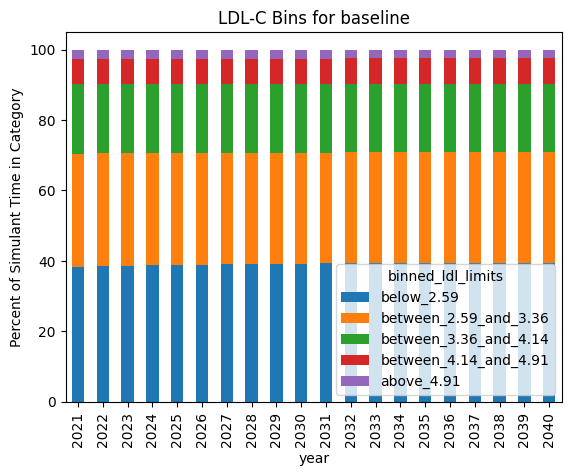

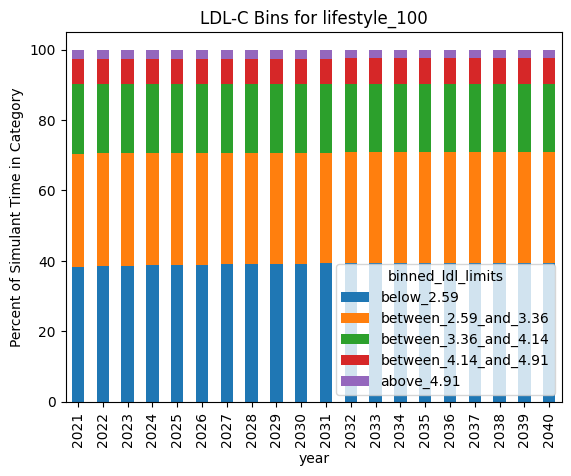

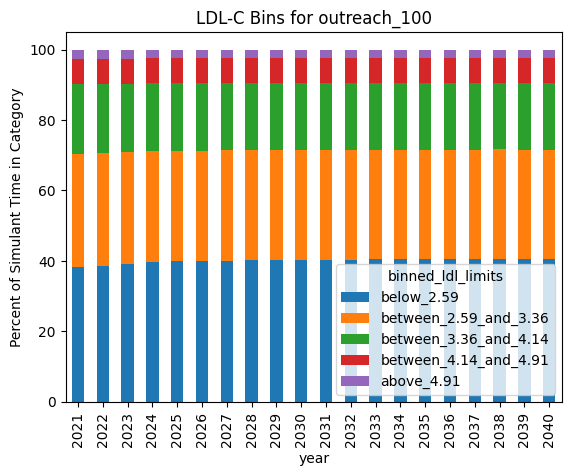

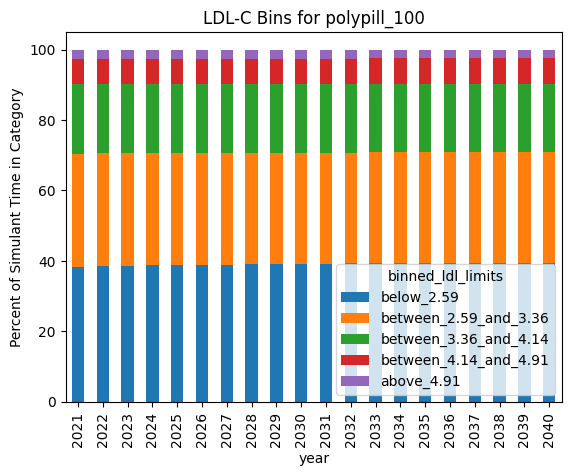

In [10]:
# Plotting
for scenario in binned_risks_ldl.scenario.unique():
    subdata = binned_risks_ldl.loc[binned_risks_ldl.scenario == scenario]
    pivot_df = subdata.pivot(index='year', columns='binned_ldl_limits', values='value')
    
    column_order = ['below_2.59', 'between_2.59_and_3.36', 'between_3.36_and_4.14', 'between_4.14_and_4.91', 'above_4.91']
    pivot_df = pivot_df[column_order]
    
    # Calculate the total for each category
    totals = [a+b+c+d+e for a,b,c,d,e in zip(pivot_df['below_2.59'], pivot_df['between_2.59_and_3.36'], pivot_df['between_3.36_and_4.14'], pivot_df['between_4.14_and_4.91'], pivot_df['above_4.91'])]

    # Normalize the data to make each category sum to 100%
    pivot_df['below_2.59'] = [a/total*100 for a,total in zip(pivot_df['below_2.59'], totals)]
    pivot_df['between_2.59_and_3.36'] = [b/total*100 for b,total in zip(pivot_df['between_2.59_and_3.36'], totals)]
    pivot_df['between_3.36_and_4.14'] = [c/total*100 for c,total in zip(pivot_df['between_3.36_and_4.14'], totals)]
    pivot_df['between_4.14_and_4.91'] = [d/total*100 for d,total in zip(pivot_df['between_4.14_and_4.91'], totals)]
    pivot_df['above_4.91'] = [e/total*100 for e,total in zip(pivot_df['above_4.91'], totals)]

    fig, ax = plt.subplots()
    
    pivot_df.plot(kind='bar', stacked=True, ax=ax)

    ax.set_ylabel('Percent of Simulant Time in Category')
    ax.set_title(f'LDL-C Bins for {scenario}')

    plt.show()

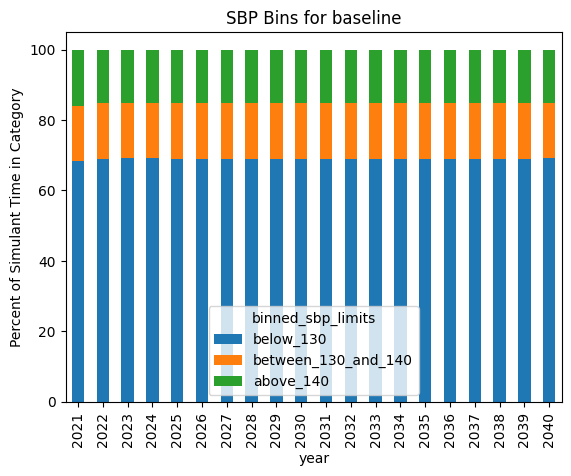

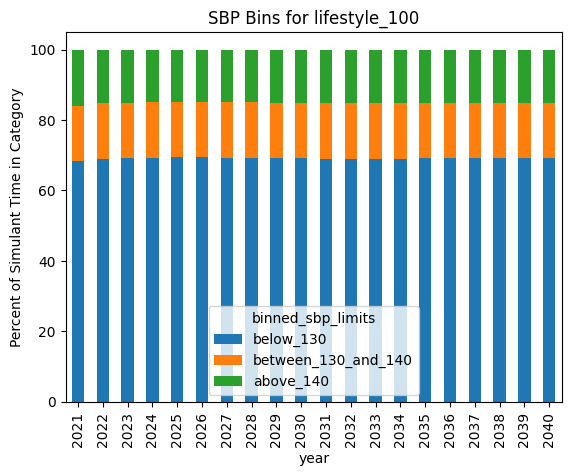

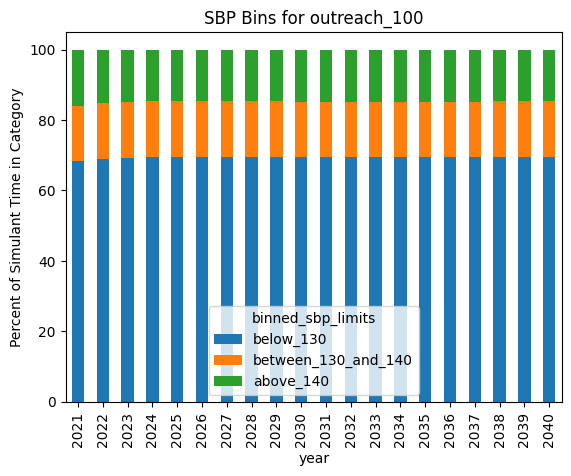

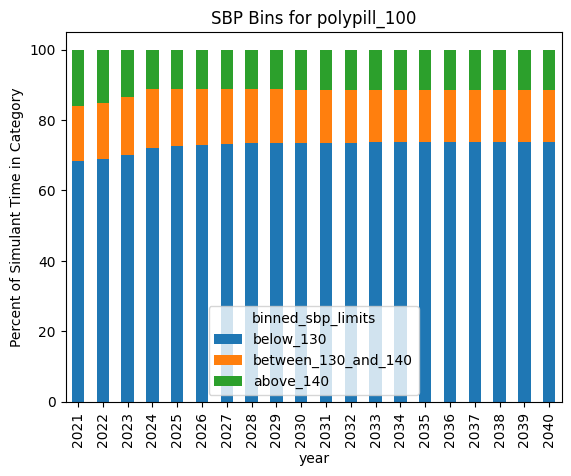

In [11]:
# Plotting
for scenario in binned_risks_sbp.scenario.unique():
    subdata = binned_risks_sbp.loc[binned_risks_sbp.scenario == scenario]
    pivot_df = subdata.pivot(index='year', columns='binned_sbp_limits', values='value')
    
    column_order = ['below_130', 'between_130_and_140', 'above_140']
    pivot_df = pivot_df[column_order]

    # Calculate the total for each category
    totals = [a+b+c for a,b,c in zip(pivot_df['below_130'], pivot_df['between_130_and_140'], pivot_df['above_140'])]

    # Normalize the data to make each category sum to 100%
    pivot_df['below_130'] = [a/total*100 for a,total in zip(pivot_df['below_130'], totals)]
    pivot_df['between_130_and_140'] = [b/total*100 for b,total in zip(pivot_df['between_130_and_140'], totals)]
    pivot_df['above_140'] = [c/total*100 for c,total in zip(pivot_df['above_140'], totals)]

    fig, ax = plt.subplots()

    pivot_df.plot(kind='bar', stacked=True, ax=ax)

    ax.set_ylabel('Percent of Simulant Time in Category')
    ax.set_title(f'SBP Bins for {scenario}')

    plt.show()